# SCRIPT TRABAJO DE PROFUNDIZACIÓN SCORING CREDITICIO: REDES NEURONALES BAYESIANAS 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

In [3]:
#%pip install plotly-express

In [4]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
import zipfile

In [6]:
archivoZip = 'home-credit-default-risk.zip'

In [7]:
#with zipfile.ZipFile(archivoZip, 'r') as zip_file:
 #   for nombre_archivo in zip_file.namelist():
  #      print(nombre_archivo)

## Cargue de bases de datos

### Train

In [8]:
with zipfile.ZipFile(archivoZip, 'r') as zip_file:
    with zip_file.open('application_train.csv') as train_trasaction:
        tt = pd.read_csv(train_trasaction)

In [9]:
#tt.head(5)

In [10]:
#tt.info()

### Otras bases: bureau.csv

In [11]:
with zipfile.ZipFile(archivoZip, 'r') as zip_file:
    with zip_file.open('bureau.csv') as bureau:
        bureau = pd.read_csv(bureau)

In [12]:
#bureau.head(5)

In [13]:
#bureau.info()

### bureau_balance.csv

In [14]:
with zipfile.ZipFile(archivoZip, 'r') as zip_file:
    with zip_file.open('bureau_balance.csv') as bureau_balance:
        bureau_balance = pd.read_csv(bureau_balance)

In [15]:
#bureau_balance.head(5)

In [16]:
#bureau_balance.info()

### credit_card_balance.csv

In [17]:
with zipfile.ZipFile(archivoZip, 'r') as zip_file:
    with zip_file.open('credit_card_balance.csv') as credit_card_balance:
        ccBalance = pd.read_csv(credit_card_balance)

In [18]:
#ccBalance.head(5)

In [19]:
#ccBalance.info()

### installments_payments.csv

In [7]:
with zipfile.ZipFile(archivoZip, 'r') as zip_file:
    with zip_file.open('installments_payments.csv') as installments_payments:
        iPayments = pd.read_csv(installments_payments)

In [24]:
iPayments.head(20)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375,5970.375
6,2234264,184693,4.0,11,-349.0,-352.0,29432.295,29432.295
7,1818599,111420,2.0,4,-968.0,-994.0,17862.165,17862.165
8,2723183,112102,0.0,14,-197.0,-197.0,70.740,70.740
9,1413990,109741,1.0,4,-570.0,-609.0,14308.470,14308.470


In [17]:
iPayments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [22]:
iPayments['AMT_PAYMENT'].isnull().sum() / len(iPayments['AMT_PAYMENT']) * 100

0.02135181462126695

### previous_application.csv

In [9]:
with zipfile.ZipFile(archivoZip, 'r') as zip_file:
    with zip_file.open('previous_application.csv') as previous_application:
        pApp = pd.read_csv(previous_application)

In [10]:
pApp.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
pApp['RATE_DOWN_PAYMENT']
     
#RATE_INTEREST_PRIMARY
#RATE_INTEREST_PRIVILEGED

0          0.000000
1               NaN
2               NaN
3               NaN
4               NaN
             ...   
1670209    0.000000
1670210    0.340554
1670211    0.101401
1670212         NaN
1670213         NaN
Name: RATE_DOWN_PAYMENT, Length: 1670214, dtype: float64

In [12]:
#pApp['RATE_DOWN_PAYMENT']
     
pApp['RATE_INTEREST_PRIMARY']
#RATE_INTEREST_PRIVILEGED

0          0.182832
1               NaN
2               NaN
3               NaN
4               NaN
             ...   
1670209         NaN
1670210         NaN
1670211         NaN
1670212         NaN
1670213         NaN
Name: RATE_INTEREST_PRIMARY, Length: 1670214, dtype: float64

In [13]:
pApp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### POS_CASH_balance.csv

In [26]:
with zipfile.ZipFile(archivoZip, 'r') as zip_file:
    with zip_file.open('POS_CASH_balance.csv') as POS_CASH_balance:
        PCBalance = pd.read_csv(POS_CASH_balance)

In [27]:
#PCBalance.head(5)

In [28]:
#PCBalance.info()

## Preprocesamiento

### previous_application

In [29]:
#Extrae información de missing values en terminos del % de datos faltantes.
#infoMissing = pd.concat([pApp.dtypes, (pApp.isnull().sum()/len(pApp))*100], axis=1)
#infoMissing.columns = ['datatype', 'missing_values']
#pd.set_option('display.max_rows', infoMissing.shape[0]+1)
#infoMissing

In [30]:
# Se identifican las columnas con más del 30% de missing values
valid_cols = pd.DataFrame(pApp.isnull().sum()/len(pApp)*100 < 30)
valid_cols = valid_cols[valid_cols[0] == True]

In [31]:
# eliminan las columnas con más de 30% de missing values
pApp = pApp[list(valid_cols.index)]
#print('Previous Application:',pApp.shape)

In [32]:
# se validan los resultados
#infoMissing = pd.concat([pApp.dtypes, (pApp.isnull().sum()/len(pApp))*100], axis=1)
#infoMissing.columns = ['datatype', 'missing_values']
#pd.set_option('display.max_rows', infoMissing.shape[0]+1)
#infoMissing

In [33]:
#(pApp["AMT_ANNUITY"] < pApp["AMT_ANNUITY"].mean()).sum() / len(pApp["AMT_ANNUITY"])

#### Imputación con ML

##### KNN

In [34]:
#from sklearn.impute import KNNImputer

In [35]:
#imputer = KNNImputer(n_neighbors=3, weights="uniform")

In [36]:
# Ajustamos el modelo e imputamos los missing values
#imputer.fit(pApp[["AMT_ANNUITY", "AMT_GOODS_PRICE", _PAYMENT", "PRODUCT_COMBINATION"]])
#imputer.fit(pApp[["AMT_ANNUITY"]])
#App["AMT_ANNUITY"] = imputer.transform(pApp[["AMT_ANNUITY"]]).ravel()

#print("Valores perdidos en normalized-losses: " + 
#     str(pApp["AMT_ANNUITY"].isnull().sum()))

###### RF

In [37]:
#%pip install missingpy

In [38]:
#!pip uninstall scikit-learn -y
#!pip install scikit-learn==0.22.1

In [39]:
#import sys
#sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
#from missingpy import MissForest

#X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
#imputer = MissForest()
#X_imputed = imputer.fit_transform(X)

In [40]:
#imp_forest = MissForest(max_iter=2)

In [41]:
#df_imput06 = pApp[["AMT_ANNUITY", "AMT_GOODS_PRICE", "CNT_PAYMENT", "PRODUCT_COMBINATION"]]
#df_imput06 = imp_forest.fit_transform(df_imput06)

#df_imput06 = pd.DataFrame(df_imput06, columns=["AMT_ANNUITY", "AMT_GOODS_PRICE", "CNT_PAYMENT", "PRODUCT_COMBINATION"])
#print(df_imput06.shape)
#df_imput06.head()

#### Imputación multivariada

In [42]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [43]:
imp = IterativeImputer(max_iter=10, random_state=0)

In [44]:
# Realizamos la imputación multivariada de regresión
df_imput04 = pApp[["AMT_ANNUITY", "AMT_GOODS_PRICE", "CNT_PAYMENT"]]
df_imput04 = imp.fit_transform(df_imput04)
df_imput04 = pd.DataFrame(df_imput04, columns=["AMT_ANNUITY", "AMT_GOODS_PRICE", "CNT_PAYMENT"])
print(df_imput04.shape)
df_imput04.head()

(1670214, 3)


,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_PAYMENT
0,1730.430,17145.0,12.0
1,25188.615,607500.0,36.0
2,15060.735,112500.0,12.0
3,47041.335,450000.0,12.0
4,31924.395,337500.0,24.0


#### Imputación con la media

In [45]:
pApp["AMT_ANNUITY"] = (pApp["AMT_ANNUITY"].fillna(pApp["AMT_ANNUITY"].mean()))
#pApp["AMT_ANNUITY"].describe()

In [46]:
pApp["CNT_PAYMENT"] = (pApp["CNT_PAYMENT"].fillna(pApp["CNT_PAYMENT"].mean()))
#pApp["CNT_PAYMENT"].describe()

In [47]:
pApp["AMT_GOODS_PRICE"] = (pApp["AMT_GOODS_PRICE"].fillna(pApp["AMT_GOODS_PRICE"].mean()))
#pApp["AMT_GOODS_PRICE"].describe()

In [48]:
(pApp["PRODUCT_COMBINATION"].isnull()).sum()

346

In [49]:
#pApp["PRODUCT_COMBINATION"].unique()
p = pApp.groupby(["PRODUCT_COMBINATION"], as_index=False)["SK_ID_PREV"].count()
#p

<Axes: xlabel='PRODUCT_COMBINATION', ylabel='SK_ID_PREV'>

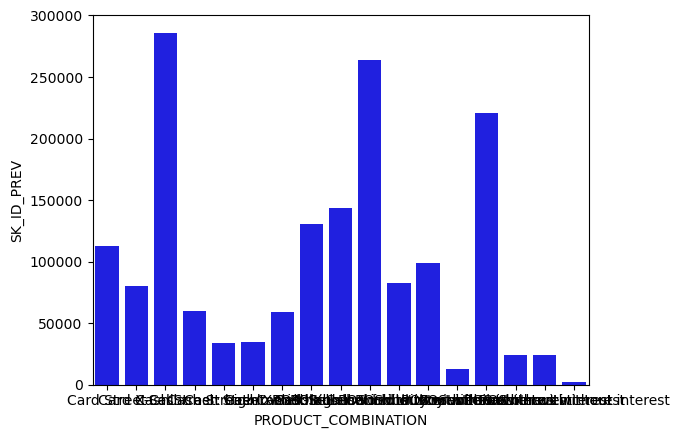

In [50]:
sns.barplot(x="PRODUCT_COMBINATION", y="SK_ID_PREV", data=p,
             color="b")

#### Imputación con la moda

In [51]:
pApp["PRODUCT_COMBINATION"] = pApp["PRODUCT_COMBINATION"].fillna("CASH")

In [52]:
# se validan los resultados
#infoMissing = pd.concat([pApp.dtypes, (pApp.isnull().sum()/len(pApp))*100], axis=1)
#infoMissing.columns = ['datatype', 'missing_values']
#pd.set_option('display.max_rows', infoMissing.shape[0]+1)
#infoMissing

### iPayments

In [53]:
#Extrae información de missing values en terminos del % de datos faltantes.
#infoMissing = pd.concat([iPayments.dtypes, (iPayments.isnull().sum()/len(iPayments))*100], axis=1)
#infoMissing.columns = ['datatype', 'missing_values']
#pd.set_option('display.max_rows', infoMissing.shape[0]+1)
#infoMissing

In [54]:
#iPayments.describe()

#### Imputación con la media

In [55]:
iPayments["AMT_PAYMENT"] = (iPayments["AMT_PAYMENT"].fillna(iPayments["AMT_PAYMENT"].mean()))
#iPayments["AMT_PAYMENT"].describe()

In [56]:
iPayments["DAYS_ENTRY_PAYMENT"] = (iPayments["DAYS_ENTRY_PAYMENT"].fillna(iPayments["DAYS_ENTRY_PAYMENT"].mean()))
#iPayments["DAYS_ENTRY_PAYMENT"].describe()

In [57]:
#Extrae información de missing values en terminos del % de datos faltantes.
#infoMissing = pd.concat([iPayments.dtypes, (iPayments.isnull().sum()/len(iPayments))*100], axis=1)
#infoMissing.columns = ['datatype', 'missing_values']
#pd.set_option('display.max_rows', infoMissing.shape[0]+1)
#infoMissing

### ccBalance

In [58]:
#Extrae información de missing values en terminos del % de datos faltantes.
#infoMissing = pd.concat([ccBalance.dtypes, (ccBalance.isnull().sum()/len(ccBalance))*100], axis=1)
#infoMissing.columns = ['datatype', 'missing_values']
#pd.set_option('display.max_rows', infoMissing.shape[0]+1)
#infoMissing[infoMissing["missing_values"] > 0]

In [59]:
# Realizamos la imputación multivariada de regresión
df_imput04 = ccBalance[["AMT_DRAWINGS_ATM_CURRENT", "AMT_DRAWINGS_OTHER_CURRENT", 
                                               "AMT_DRAWINGS_POS_CURRENT", "AMT_INST_MIN_REGULARITY", "AMT_PAYMENT_CURRENT",
                                              "CNT_DRAWINGS_ATM_CURRENT", "CNT_DRAWINGS_OTHER_CURRENT", "CNT_DRAWINGS_POS_CURRENT",
                                              "CNT_INSTALMENT_MATURE_CUM"]]
df_imput04 = imp.fit_transform(df_imput04)
df_imput04 = pd.DataFrame(df_imput04, columns=["AMT_DRAWINGS_ATM_CURRENT", "AMT_DRAWINGS_OTHER_CURRENT", 
                                               "AMT_DRAWINGS_POS_CURRENT", "AMT_INST_MIN_REGULARITY", "AMT_PAYMENT_CURRENT",
                                              "CNT_DRAWINGS_ATM_CURRENT", "CNT_DRAWINGS_OTHER_CURRENT", "CNT_DRAWINGS_POS_CURRENT",
                                              "CNT_INSTALMENT_MATURE_CUM"])
#print(df_imput04.shape)
#df_imput04.head()

In [60]:
#df_imput04.describe()

In [61]:
#ccBalance[["AMT_DRAWINGS_ATM_CURRENT", "AMT_DRAWINGS_OTHER_CURRENT", 
#            "AMT_DRAWINGS_POS_CURRENT", "AMT_INST_MIN_REGULARITY", "AMT_PAYMENT_CURRENT",
#            "CNT_DRAWINGS_ATM_CURRENT", "CNT_DRAWINGS_OTHER_CURRENT", "CNT_DRAWINGS_POS_CURRENT",
#            "CNT_INSTALMENT_MATURE_CUM"]].describe()

In [62]:
#(ccBalance["AMT_PAYMENT_CURRENT"].fillna(ccBalance["AMT_PAYMENT_CURRENT"].mean())).describe()
#iPayments["DAYS_ENTRY_PAYMENT"].describe()

In [63]:
 def imputacionMedia(columna):
    columna = (columna.fillna(columna.mean()))
    descriptivos = columna.describe()
    return columna

In [64]:
ccBalance["AMT_PAYMENT_CURRENT"] = imputacionMedia(ccBalance["AMT_PAYMENT_CURRENT"])

In [65]:
ccBalance["AMT_DRAWINGS_ATM_CURRENT"] = imputacionMedia(ccBalance["AMT_DRAWINGS_ATM_CURRENT"])
ccBalance["AMT_DRAWINGS_OTHER_CURRENT"] = imputacionMedia(ccBalance["AMT_DRAWINGS_OTHER_CURRENT"])
ccBalance["AMT_DRAWINGS_POS_CURRENT"] = imputacionMedia(ccBalance["AMT_DRAWINGS_POS_CURRENT"])
ccBalance["AMT_INST_MIN_REGULARITY"] = imputacionMedia(ccBalance["AMT_INST_MIN_REGULARITY"])
ccBalance["CNT_DRAWINGS_ATM_CURRENT"] = imputacionMedia(ccBalance["CNT_DRAWINGS_ATM_CURRENT"])
ccBalance["CNT_DRAWINGS_OTHER_CURRENT"] = imputacionMedia(ccBalance["CNT_DRAWINGS_OTHER_CURRENT"])
ccBalance["CNT_DRAWINGS_POS_CURRENT"] = imputacionMedia(ccBalance["CNT_DRAWINGS_POS_CURRENT"])
ccBalance["CNT_INSTALMENT_MATURE_CUM"] = imputacionMedia(ccBalance["CNT_INSTALMENT_MATURE_CUM"])

In [66]:
#Extrae información de missing values en terminos del % de datos faltantes.
#infoMissing = pd.concat([ccBalance.dtypes, (ccBalance.isnull().sum()/len(ccBalance))*100], axis=1)
#infoMissing.columns = ['datatype', 'missing_values']
#pd.set_option('display.max_rows', infoMissing.shape[0]+1)
#infoMissing

### bureau_balance

In [67]:
#Extrae información de missing values en terminos del % de datos faltantes.
#infoMissing = pd.concat([bureau_balance.dtypes, (bureau_balance.isnull().sum()/len(bureau_balance))*100], axis=1)
#infoMissing.columns = ['datatype', 'missing_values']
#pd.set_option('display.max_rows', infoMissing.shape[0]+1)
#infoMissing

### bureau

In [68]:
#Extrae información de missing values en terminos del % de datos faltantes.
#infoMissing = pd.concat([bureau.dtypes, (bureau.isnull().sum()/len(bureau))*100], axis=1)
#infoMissing.columns = ['datatype', 'missing_values']
#pd.set_option('display.max_rows', infoMissing.shape[0]+1)
#infoMissing[infoMissing["missing_values"] > 0]

In [69]:
# Se identifican las columnas con más del 30% de missing values
valid_cols = pd.DataFrame(bureau.isnull().sum()/len(bureau)*100 < 40)
valid_cols = valid_cols[valid_cols[0] == True]


In [70]:

# eliminan las columnas con más de 40% de missing values
bureau = bureau[list(valid_cols.index)]
#print('Previous Application:',pApp.shape)

In [71]:
#Extrae información de missing values en terminos del % de datos faltantes.
#infoMissing = pd.concat([bureau.dtypes, (bureau.isnull().sum()/len(bureau))*100], axis=1)
#infoMissing.columns = ['datatype', 'missing_values']
#pd.set_option('display.max_rows', infoMissing.shape[0]+1)
#infoMissing[infoMissing["missing_values"] > 0]

In [72]:
#bureau[["DAYS_CREDIT_ENDDATE", "DAYS_ENDDATE_FACT", "AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_LIMIT"]].describe()

In [73]:
# Realizamos la imputación multivariada de regresión
df_imput04 = bureau[["DAYS_CREDIT_ENDDATE", "DAYS_ENDDATE_FACT", "AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_LIMIT"]]
df_imput04 = imp.fit_transform(df_imput04)
df_imput04 = pd.DataFrame(df_imput04, columns=["DAYS_CREDIT_ENDDATE", "DAYS_ENDDATE_FACT", 
                                               "AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT", 
                                               "AMT_CREDIT_SUM_LIMIT"])
#print(df_imput04.shape)
#df_imput04.describe()

In [74]:
bureau["DAYS_CREDIT_ENDDATE"] = df_imput04["DAYS_CREDIT_ENDDATE"]
bureau["DAYS_ENDDATE_FACT"] = df_imput04["DAYS_ENDDATE_FACT"]
bureau["AMT_CREDIT_SUM"] = df_imput04["AMT_CREDIT_SUM"]
bureau["AMT_CREDIT_SUM_DEBT"] = df_imput04["AMT_CREDIT_SUM_DEBT"]
bureau["AMT_CREDIT_SUM_LIMIT"] = df_imput04["AMT_CREDIT_SUM_LIMIT"]

In [75]:
#Extrae información de missing values en terminos del % de datos faltantes.
#infoMissing = pd.concat([bureau.dtypes, (bureau.isnull().sum()/len(bureau))*100], axis=1)
#infoMissing.columns = ['datatype', 'missing_values']
#pd.set_option('display.max_rows', infoMissing.shape[0]+1)
#infoMissing[infoMissing["missing_values"] > 0]

In [76]:

#Extrae información de missing values en terminos del % de datos faltantes.
#infoMissing = pd.concat([tt.dtypes, (tt.isnull().sum()/len(tt))*100], axis=1)
#infoMissing.columns = ['datatype', 'missing_values']
#pd.set_option('display.max_rows', infoMissing.shape[0]+1)
#infoMissing[infoMissing["missing_values"] > 0]

In [77]:
# Se identifican las columnas con más del 30% de missing values
valid_cols = pd.DataFrame(tt.isnull().sum()/len(tt)*100 < 30)
valid_cols = valid_cols[valid_cols[0] == True]

In [78]:
# eliminan las columnas con más de 30% de missing values
tt = tt[list(valid_cols.index)]
#print('Previous Application:',tt.shape)

In [79]:
#Extrae información de missing values en terminos del % de datos faltantes.
#infoMissing = pd.concat([tt.dtypes, (tt.isnull().sum()/len(tt))*100], axis=1)
#infoMissing.columns = ['datatype', 'missing_values']
#pd.set_option('display.max_rows', infoMissing.shape[0]+1)
#infoMissing[infoMissing["missing_values"] > 0]

In [80]:
# Realizamos la imputación multivariada de regresión
df_imput04 = tt[["AMT_ANNUITY", 
                    "AMT_GOODS_PRICE",
                    "CNT_FAM_MEMBERS",
                    "EXT_SOURCE_2",
                    "EXT_SOURCE_3",
                    "OBS_30_CNT_SOCIAL_CIRCLE",
                    "DEF_30_CNT_SOCIAL_CIRCLE",
                    "OBS_60_CNT_SOCIAL_CIRCLE",
                    "DEF_60_CNT_SOCIAL_CIRCLE",
                    "DAYS_LAST_PHONE_CHANGE",
                    "AMT_REQ_CREDIT_BUREAU_HOUR",
                    "AMT_REQ_CREDIT_BUREAU_DAY",
                    "AMT_REQ_CREDIT_BUREAU_WEEK",
                    "AMT_REQ_CREDIT_BUREAU_MON",
                    "AMT_REQ_CREDIT_BUREAU_QRT",
                    "AMT_REQ_CREDIT_BUREAU_YEAR"]]
df_imput04 = imp.fit_transform(df_imput04)
df_imput04 = pd.DataFrame(df_imput04, columns=["AMT_ANNUITY", 
                                                "AMT_GOODS_PRICE",
                                                "CNT_FAM_MEMBERS",
                                                "EXT_SOURCE_2",
                                                "EXT_SOURCE_3",
                                                "OBS_30_CNT_SOCIAL_CIRCLE",
                                                "DEF_30_CNT_SOCIAL_CIRCLE",
                                                "OBS_60_CNT_SOCIAL_CIRCLE",
                                                "DEF_60_CNT_SOCIAL_CIRCLE",
                                                "DAYS_LAST_PHONE_CHANGE",
                                                "AMT_REQ_CREDIT_BUREAU_HOUR",
                                                "AMT_REQ_CREDIT_BUREAU_DAY",
                                                "AMT_REQ_CREDIT_BUREAU_WEEK",
                                                "AMT_REQ_CREDIT_BUREAU_MON",
                                                "AMT_REQ_CREDIT_BUREAU_QRT",
                                                "AMT_REQ_CREDIT_BUREAU_YEAR"])
#print(df_imput04.shape)
#df_imput04.describe()

In [81]:
#a = df_imput04.describe()
#b = tt[["AMT_ANNUITY", 
               #     "AMT_GOODS_PRICE",
              #      "CNT_FAM_MEMBERS",
             #       "EXT_SOURCE_2",
            #        "EXT_SOURCE_3",
           #         "OBS_30_CNT_SOCIAL_CIRCLE",
          #          "DEF_30_CNT_SOCIAL_CIRCLE",
         #           "OBS_60_CNT_SOCIAL_CIRCLE",
        #            "DEF_60_CNT_SOCIAL_CIRCLE",
       #             "DAYS_LAST_PHONE_CHANGE",
      #              "AMT_REQ_CREDIT_BUREAU_HOUR",
     #               "AMT_REQ_CREDIT_BUREAU_DAY",
    #                "AMT_REQ_CREDIT_BUREAU_WEEK",
   #                 "AMT_REQ_CREDIT_BUREAU_MON",
  #                  "AMT_REQ_CREDIT_BUREAU_QRT",
 #                   "AMT_REQ_CREDIT_BUREAU_YEAR"]].describe()
#a - b

In [82]:
tt["AMT_ANNUITY"] = df_imput04["AMT_ANNUITY"] 
tt["CNT_FAM_MEMBERS"] = df_imput04["CNT_FAM_MEMBERS"]
tt["EXT_SOURCE_2"] = df_imput04["EXT_SOURCE_2"]
tt["EXT_SOURCE_3"] = df_imput04["EXT_SOURCE_3"]
tt["OBS_30_CNT_SOCIAL_CIRCLE"] = df_imput04["OBS_30_CNT_SOCIAL_CIRCLE"]
tt["DEF_30_CNT_SOCIAL_CIRCLE"] = df_imput04["DEF_30_CNT_SOCIAL_CIRCLE"]
tt["OBS_60_CNT_SOCIAL_CIRCLE"] = df_imput04["OBS_60_CNT_SOCIAL_CIRCLE"]
tt["DEF_60_CNT_SOCIAL_CIRCLE"] = df_imput04["DEF_60_CNT_SOCIAL_CIRCLE"]
tt["DAYS_LAST_PHONE_CHANGE"] = df_imput04["DAYS_LAST_PHONE_CHANGE"]
tt["AMT_REQ_CREDIT_BUREAU_HOUR"] = df_imput04["AMT_REQ_CREDIT_BUREAU_HOUR"]
tt["AMT_REQ_CREDIT_BUREAU_DAY"] = df_imput04["AMT_REQ_CREDIT_BUREAU_DAY"]
tt["AMT_REQ_CREDIT_BUREAU_WEEK"] = df_imput04["AMT_REQ_CREDIT_BUREAU_WEEK"]
tt["AMT_REQ_CREDIT_BUREAU_MON"] = df_imput04["AMT_REQ_CREDIT_BUREAU_MON"] 
tt["AMT_REQ_CREDIT_BUREAU_QRT"] = df_imput04["AMT_REQ_CREDIT_BUREAU_QRT"]
tt["AMT_REQ_CREDIT_BUREAU_YEAR"] = df_imput04["AMT_REQ_CREDIT_BUREAU_YEAR"]

In [83]:
#Extrae información de missing values en terminos del % de datos faltantes.
#infoMissing = pd.concat([tt.dtypes, (tt.isnull().sum()/len(tt))*100], axis=1)
#infoMissing.columns = ['datatype', 'missing_values']
#pd.set_option('display.max_rows', infoMissing.shape[0]+1)
#infoMissing[infoMissing["missing_values"] > 0]

In [84]:
tt["AMT_GOODS_PRICE"] = imputacionMedia(tt["AMT_GOODS_PRICE"])

In [85]:
#tt.head()

In [86]:
#categoricos
p = tt.groupby(["NAME_TYPE_SUITE"], as_index=False)["SK_ID_CURR"].count()
#p

In [87]:
#sns.barplot(x="NAME_TYPE_SUITE", y="SK_ID_CURR", data=p,
#             color="b")

In [88]:

tt["NAME_TYPE_SUITE"] = tt["NAME_TYPE_SUITE"].fillna("Unaccompanied")

In [89]:
#(tt["AMT_GOODS_PRICE"].isnull()).sum()

In [90]:
#Extrae información de missing values en terminos del % de datos faltantes.
#infoMissing = pd.concat([tt.dtypes, (tt.isnull().sum()/len(tt))*100], axis=1)
#infoMissing.columns = ['datatype', 'missing_values']
#pd.set_option('display.max_rows', infoMissing.shape[0]+1)
#infoMissing[infoMissing["missing_values"] > 0]

### PCBalance

In [91]:
#Extrae información de missing values en terminos del % de datos faltantes.
#infoMissing = pd.concat([PCBalance.dtypes, (PCBalance.isnull().sum()/len(PCBalance))*100], axis=1)
#infoMissing.columns = ['datatype', 'missing_values']
#pd.set_option('display.max_rows', infoMissing.shape[0]+1)
#infoMissing[infoMissing["missing_values"] > 0]

In [92]:
PCBalance["CNT_INSTALMENT"] = imputacionMedia(PCBalance["CNT_INSTALMENT"])
PCBalance["CNT_INSTALMENT_FUTURE"] = imputacionMedia(PCBalance["CNT_INSTALMENT_FUTURE"])

In [93]:
#Extrae información de missing values en terminos del % de datos faltantes.
#infoMissing = pd.concat([PCBalance.dtypes, (PCBalance.isnull().sum()/len(PCBalance))*100], axis=1)
#infoMissing.columns = ['datatype', 'missing_values']
#pd.set_option('display.max_rows', infoMissing.shape[0]+1)
#infoMissing[infoMissing["missing_values"] > 0]

### ANALISIS DE CORRELACION

#### POS_CASH_balance

In [94]:
#PCBalance.info()

In [95]:
#sns.pairplot(PCBalance[['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']])

In [96]:
#corr_PCB = PCBalance[['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']].corr(method = 'spearman')
#corr_PCB.style.background_gradient (cmap = 'coolwarm')

In [97]:
import scipy.stats as stats

# Calcular el coeficiente de correlación de Spearman y su valor p correspondiente
corr_coef, p_value = stats.spearmanr(PCBalance['CNT_INSTALMENT'],PCBalance['CNT_INSTALMENT_FUTURE'])

print('Coeficiente de correlación de Spearman:', corr_coef)
print('Valor p:', p_value)

### Se mantiene 'CNT_INSTALMENT_FUTURE' 'SK_DPD_DEF'

Coeficiente de correlación de Spearman: 0.7413850071561904
Valor p: 0.0


In [98]:
crosstab = tt[['SK_ID_CURR','TARGET']]
con = pd.merge(PCBalance, crosstab, on = 'SK_ID_CURR')

In [99]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [100]:
from scipy import special

In [101]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
contingency_table = pd.crosstab(con["TARGET"], con["NAME_CONTRACT_STATUS"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print("Valor p:\n", p)
print("Grados de libertad:\n", dof)
print("Frecuencias esperadas:\n", expected)

Prueba chi-cuadrado:
 787.9481200401787
Valor p:
 8.143339817980103e-165
Grados de libertad:
 8
Frecuencias esperadas:
 [[7.24331862e+06 3.38144818e+02 3.91043638e+03 1.11170899e+01
  5.88160759e+05 5.66045161e+03 4.25321331e+03 6.91344029e+04
  1.85284832e+00]
 [5.75258378e+05 2.68551819e+01 3.10563625e+02 8.82910091e-01
  4.67112413e+04 4.49548388e+02 3.37786686e+02 5.49059713e+03
  1.47151682e-01]]


In [102]:
PCBalance = PCBalance[['SK_ID_CURR', 'MONTHS_BALANCE', 'NAME_CONTRACT_STATUS', 'CNT_INSTALMENT_FUTURE', 'SK_DPD_DEF']]

In [103]:
pcb_dummie = pd.get_dummies(PCBalance['NAME_CONTRACT_STATUS'])

In [104]:
pcb_dummie.head()

,Active,Amortized debt,Approved,Canceled,Completed,Demand,Returned to the store,Signed,XNA
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [105]:
pcb_dummie = pcb_dummie.rename(columns={'Active':'PCB_Active', 'Amortized debt':'PCB_Amortized_debt',
                                        'Approved':'PCB_Approved', 'Canceled':'PCB_Canceled', 'Completed':'PCB_Completed',
                                       'Demand':'PCB_Demand', 'Returned to the store':'PCB_Returned_store',
                                       'Signed':'PCB_Signed'})


In [106]:
pcb = pd.concat([PCBalance, pcb_dummie], axis=1)
pcb.head(5)

,SK_ID_CURR,MONTHS_BALANCE,NAME_CONTRACT_STATUS,CNT_INSTALMENT_FUTURE,SK_DPD_DEF,PCB_Active,PCB_Amortized_debt,PCB_Approved,PCB_Canceled,PCB_Completed,PCB_Demand,PCB_Returned_store,PCB_Signed,XNA
0,182943,-31,Active,45.0,0,1,0,0,0,0,0,0,0,0
1,367990,-33,Active,35.0,0,1,0,0,0,0,0,0,0,0
2,397406,-32,Active,9.0,0,1,0,0,0,0,0,0,0,0
3,269225,-35,Active,42.0,0,1,0,0,0,0,0,0,0,0
4,334279,-35,Active,35.0,0,1,0,0,0,0,0,0,0,0


In [107]:
#pcb = pcb.drop(['NAME_CONTRACT_STATUS', 'XNA'], axis = 1)

In [108]:
pc = pcb.groupby('SK_ID_CURR')['MONTHS_BALANCE'].agg(['count', 'mean', 'min', 'max'])

In [109]:
pc_agg1 = pcb.groupby('SK_ID_CURR').agg({
    'PCB_Active': 'sum',
    'PCB_Amortized_debt': 'sum',
    'PCB_Approved':'sum',
    'PCB_Completed': 'sum',
    'PCB_Canceled':'sum',
    'PCB_Demand': 'sum',
    'PCB_Returned_store': 'sum',
    'PCB_Signed':'sum'
}).rename(columns={
    'count': 'pcb_MB_count',
    'mean': 'pcb_MB_mean',
    'min': 'pcb_MB_min',
    'max': 'pcb_MB_max'
}).reset_index()

#pcb = pd.merge(pc, pc_agg, on='SK_ID_BUREAU', how='left')

#bub.head()

In [110]:
pc_agg2 = pcb.groupby('SK_ID_CURR')['CNT_INSTALMENT_FUTURE'].agg([
    'mean', 'min', 'max'
]).rename(columns={
    'mean': 'pcb_FUTURE_mean',
    'min': 'pcb_FUTURE_min',
    'max': 'pcb_FUTURE_max'
}).reset_index()

In [111]:
pc_agg3 = pcb.groupby('SK_ID_CURR')['SK_DPD_DEF'].agg([
    'mean', 'min', 'max'
]).rename(columns={
    'mean': 'pcb_DPD_mean',
    'min': 'pcb__DPD_min',
    'max': 'pcb__DPD_max'
}).reset_index()

pcb = pd.merge(pc, pc_agg1, on='SK_ID_CURR', how='left')

pcb.head()

,SK_ID_CURR,count,mean,min,max,PCB_Active,PCB_Amortized_debt,PCB_Approved,PCB_Completed,PCB_Canceled,PCB_Demand,PCB_Returned_store,PCB_Signed
0,100001,9,-72.555556,-96,-53,7,0,0,2,0,0,0,0
1,100002,19,-10.000000,-19,-1,19,0,0,0,0,0,0,0
2,100003,28,-43.785714,-77,-18,26,0,0,2,0,0,0,0
3,100004,4,-25.500000,-27,-24,3,0,0,1,0,0,0,0
4,100005,11,-20.000000,-25,-15,9,0,0,1,0,0,0,1


In [112]:
pcb = pd.merge(pcb, pc_agg2, on='SK_ID_CURR', how = 'left')
pcb.head()

,SK_ID_CURR,count,mean,min,max,PCB_Active,PCB_Amortized_debt,PCB_Approved,PCB_Completed,PCB_Canceled,PCB_Demand,PCB_Returned_store,PCB_Signed,pcb_FUTURE_mean,pcb_FUTURE_min,pcb_FUTURE_max
0,100001,9,-72.555556,-96,-53,7,0,0,2,0,0,0,0,1.444444,0.0,4.0
1,100002,19,-10.000000,-19,-1,19,0,0,0,0,0,0,0,15.000000,6.0,24.0
2,100003,28,-43.785714,-77,-18,26,0,0,2,0,0,0,0,5.785714,0.0,12.0
3,100004,4,-25.500000,-27,-24,3,0,0,1,0,0,0,0,2.250000,0.0,4.0
4,100005,11,-20.000000,-25,-15,9,0,0,1,0,0,0,1,7.498531,0.0,12.0


In [113]:
pcb = pd.merge(pcb, pc_agg3, on='SK_ID_CURR', how = 'left')
pcb.head()

,SK_ID_CURR,count,mean,min,max,PCB_Active,PCB_Amortized_debt,PCB_Approved,PCB_Completed,PCB_Canceled,PCB_Demand,PCB_Returned_store,PCB_Signed,pcb_FUTURE_mean,pcb_FUTURE_min,pcb_FUTURE_max,pcb_DPD_mean,pcb__DPD_min,pcb__DPD_max
0,100001,9,-72.555556,-96,-53,7,0,0,2,0,0,0,0,1.444444,0.0,4.0,0.777778,0,7
1,100002,19,-10.000000,-19,-1,19,0,0,0,0,0,0,0,15.000000,6.0,24.0,0.000000,0,0
2,100003,28,-43.785714,-77,-18,26,0,0,2,0,0,0,0,5.785714,0.0,12.0,0.000000,0,0
3,100004,4,-25.500000,-27,-24,3,0,0,1,0,0,0,0,2.250000,0.0,4.0,0.000000,0,0
4,100005,11,-20.000000,-25,-15,9,0,0,1,0,0,0,1,7.498531,0.0,12.0,0.000000,0,0


In [114]:
pcb = pcb.rename(columns={
    'count': 'pcb_MB_count',
    'mean': 'pcb_MB_mean',
    'min': 'pcb_MB_min',
    'max': 'pcb_MB_max'})

pcb.head()

,SK_ID_CURR,pcb_MB_count,pcb_MB_mean,pcb_MB_min,pcb_MB_max,PCB_Active,PCB_Amortized_debt,PCB_Approved,PCB_Completed,PCB_Canceled,PCB_Demand,PCB_Returned_store,PCB_Signed,pcb_FUTURE_mean,pcb_FUTURE_min,pcb_FUTURE_max,pcb_DPD_mean,pcb__DPD_min,pcb__DPD_max
0,100001,9,-72.555556,-96,-53,7,0,0,2,0,0,0,0,1.444444,0.0,4.0,0.777778,0,7
1,100002,19,-10.000000,-19,-1,19,0,0,0,0,0,0,0,15.000000,6.0,24.0,0.000000,0,0
2,100003,28,-43.785714,-77,-18,26,0,0,2,0,0,0,0,5.785714,0.0,12.0,0.000000,0,0
3,100004,4,-25.500000,-27,-24,3,0,0,1,0,0,0,0,2.250000,0.0,4.0,0.000000,0,0
4,100005,11,-20.000000,-25,-15,9,0,0,1,0,0,0,1,7.498531,0.0,12.0,0.000000,0,0


#### bureau

In [115]:
#bureau.shape

In [116]:
#bureau.info()

In [117]:
from scipy.stats import shapiro

# Crear un arreglo de datos de ejemplo
data = bureau['AMT_CREDIT_SUM']
# Realizar la prueba de Shapiro-Wilk
stat, p = shapiro(data)

# Imprimir el resultado
print("Estadístico de prueba:", stat)
print("Valor p:", p)


Estadístico de prueba: 0.20697909593582153
Valor p: 0.0


In [118]:
from scipy.stats import kstest, norm

mu, std = norm.fit(data)

# Realizar la prueba de Kolmogorov-Smirnov
stat, p = kstest(data, 'norm', args=(mu, std))

# Imprimir el resultado
print("Estadístico de prueba:", stat)
print('Valor p: {:.60f}'.format(p))

Estadístico de prueba: 0.3787578969857054
Valor p: 0.000000000000000000000000000000000000000000000000000000000000


In [119]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,215354,5714462,Closed,currency 1,-497,0,-153.000000,-153.000000,0,91323.0,0.000000e+00,761.975463,0.0,Consumer credit,-131
1,215354,5714463,Active,currency 1,-208,0,1075.000000,-942.832282,0,225000.0,1.713420e+05,7023.719023,0.0,Credit card,-20
2,215354,5714464,Active,currency 1,-203,0,528.000000,-966.793550,0,464323.5,1.925197e+05,6209.442126,0.0,Consumer credit,-16
3,215354,5714465,Active,currency 1,-203,0,545.156974,-967.865376,0,90000.0,2.477633e+04,6444.373173,0.0,Credit card,-16
4,215354,5714466,Active,currency 1,-629,0,1197.000000,-912.997752,0,2700000.0,1.198961e+06,6224.175847,0.0,Consumer credit,-21


In [120]:
#corr_bureau = bureau[['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT',
#                      'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
#                      'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 
#                      'DAYS_CREDIT_UPDATE']].corr(method = 'spearman')
#corr_bureau.style.background_gradient (cmap = 'coolwarm')

In [121]:
#sns.heatmap(corr_bureau, annot=True)

In [122]:
# Calcular el coeficiente de correlación de Spearman y su valor p correspondiente
corr_coef, p_value = stats.spearmanr(bureau['CREDIT_DAY_OVERDUE'],bureau['AMT_CREDIT_SUM_OVERDUE'])

print('Coeficiente de correlación de Spearman:', corr_coef)
print('Valor p:', p_value)

Coeficiente de correlación de Spearman: 0.9337084443664405
Valor p: 0.0


In [123]:
# Calcular el coeficiente de correlación de Spearman y su valor p correspondiente
corr_coef, p_value = stats.spearmanr(bureau['DAYS_ENDDATE_FACT'],bureau['DAYS_CREDIT'])

print('Coeficiente de correlación de Spearman:', corr_coef)
print('Valor p:', p_value)

Coeficiente de correlación de Spearman: 0.5704964049477629
Valor p: 0.0


In [124]:
# Calcular el coeficiente de correlación de Spearman y su valor p correspondiente
corr_coef = stats.spearmanr(bureau['DAYS_ENDDATE_FACT'],bureau['DAYS_CREDIT_ENDDATE'])

print('Coeficiente de correlación de Spearman:', corr_coef.statistic )
print('Valor p: {:.60f}'.format(corr_coef.pvalue))

Coeficiente de correlación de Spearman: 0.5550442229249343
Valor p: 0.000000000000000000000000000000000000000000000000000000000000


In [125]:
# Calcular el coeficiente de correlación de Spearman y su valor p correspondiente
corr_coef, p_value = stats.spearmanr(bureau['DAYS_ENDDATE_FACT'],bureau['AMT_CREDIT_SUM_DEBT'])

print('Coeficiente de correlación de Spearman:', corr_coef)
print('Valor p: {:.5f}'.format(p_value))

Coeficiente de correlación de Spearman: -0.03065936786790993
Valor p: 0.00000


In [126]:
# Calcular el coeficiente de correlación de Spearman y su valor p correspondiente
corr_coef, p_value = stats.spearmanr(bureau['DAYS_ENDDATE_FACT'],bureau['DAYS_CREDIT_UPDATE'])

print('Coeficiente de correlación de Spearman:', corr_coef)
print('Valor p: {:.5f}'.format(p_value))

Coeficiente de correlación de Spearman: 0.476992409678261
Valor p: 0.00000


In [127]:
"""import networkx as nx
# Convertir la matriz de correlación en un grafo
G = nx.Graph()
for i, col_i in enumerate(corr_bureau.columns):
    for j, col_j in enumerate(corr_bureau.columns):
        if i < j:
            G.add_edge(col_i, col_j, weight=corr_bureau.loc[col_i, col_j])

# Graficar el grafo
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos=pos)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
plt.axis('off')
plt.show()"""

"import networkx as nx\n# Convertir la matriz de correlación en un grafo\nG = nx.Graph()\nfor i, col_i in enumerate(corr_bureau.columns):\n    for j, col_j in enumerate(corr_bureau.columns):\n        if i < j:\n            G.add_edge(col_i, col_j, weight=corr_bureau.loc[col_i, col_j])\n\n# Graficar el grafo\npos = nx.spring_layout(G, seed=42)\nnx.draw_networkx(G, pos=pos)\nlabels = nx.get_edge_attributes(G, 'weight')\nnx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)\nplt.axis('off')\nplt.show()"

In [128]:
bureau = bureau.drop(['DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_SUM_DEBT', 'DAYS_CREDIT_UPDATE'], axis=1)

In [129]:
bu = bureau[['SK_ID_CURR', 'CREDIT_TYPE', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY']] 

In [130]:
con = pd.merge(bu, crosstab, on = 'SK_ID_CURR')

In [131]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(con["CREDIT_ACTIVE"], con["CREDIT_TYPE"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print('Valor {:.5f}'.format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)

Prueba chi-cuadrado:
 253455.71438083352
Valor 0.00000


In [132]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(con["CREDIT_ACTIVE"], con["CREDIT_CURRENCY"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print('Valor {:.5f}'.format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)

Prueba chi-cuadrado:
 325.2743073483943
Valor 0.00000


In [133]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(con["CREDIT_TYPE"], con["CREDIT_CURRENCY"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print('Valor {:.5f}'.format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)

Prueba chi-cuadrado:
 8197.592554775672
Valor 0.00000


In [134]:
bureau.CREDIT_ACTIVE.value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

In [135]:
bureau.CREDIT_TYPE.value_counts() / len(bureau.CREDIT_TYPE) * 100

Consumer credit                                 72.919750
Credit card                                     23.432093
Car loan                                         1.613234
Mortgage                                         1.071469
Microloan                                        0.723188
Loan for business development                    0.115065
Another type of loan                             0.059251
Unknown type of loan                             0.032335
Loan for working capital replenishment           0.027324
Cash loan (non-earmarked)                        0.003263
Real estate loan                                 0.001573
Loan for the purchase of equipment               0.001107
Loan for purchase of shares (margin lending)     0.000233
Mobile operator loan                             0.000058
Interbank credit                                 0.000058
Name: CREDIT_TYPE, dtype: float64

In [136]:
bureau.CREDIT_CURRENCY.value_counts()

currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: CREDIT_CURRENCY, dtype: int64

In [137]:
bu = bureau.drop(['CREDIT_CURRENCY', 'CREDIT_TYPE'], axis = 1) 

In [138]:
bu = bu.drop(['AMT_CREDIT_SUM_OVERDUE'], axis = 1) 

In [139]:
#bu.info()

In [140]:
bu_dummies = pd.get_dummies(bu['CREDIT_ACTIVE'])

In [141]:
bu_dummies.head()

,Active,Bad debt,Closed,Sold
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [142]:
bu_dummies = bu_dummies.rename(columns={'Active':'Bu_Active', 'Bad debt':'bu_Bad_debt',
                                        'Closed':'Bu_Closed', 'Sold':'Bu_Sold'})

In [143]:
bu = pd.concat([bu, bu_dummies], axis=1)
bu.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_DAY_OVERDUE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_LIMIT,Bu_Active,bu_Bad_debt,Bu_Closed,Bu_Sold
0,215354,5714462,Closed,0,-153.000000,0,91323.0,761.975463,0,0,1,0
1,215354,5714463,Active,0,-942.832282,0,225000.0,7023.719023,1,0,0,0
2,215354,5714464,Active,0,-966.793550,0,464323.5,6209.442126,1,0,0,0
3,215354,5714465,Active,0,-967.865376,0,90000.0,6444.373173,1,0,0,0
4,215354,5714466,Active,0,-912.997752,0,2700000.0,6224.175847,1,0,0,0


#### bureau_balance

In [144]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [145]:
#bureau_balance.head()

In [146]:
corr_bureau_balance = bureau_balance.corr(method = 'spearman')
corr_bureau_balance.style.background_gradient (cmap = 'coolwarm')

,SK_ID_BUREAU,MONTHS_BALANCE
SK_ID_BUREAU,1.000000,0.010271
MONTHS_BALANCE,0.010271,1.000000


In [147]:
bub_dummie = pd.get_dummies(bureau_balance['STATUS']) 

In [148]:
bub_dummie.head()

,0,1,2,3,4,5,C,X
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0


In [149]:
bureau_balance = pd.concat([bureau_balance, bub_dummie], axis=1)
bureau_balance.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS,0,1,2,3,4,5,C,X
0,5715448,0,C,0,0,0,0,0,0,1,0
1,5715448,-1,C,0,0,0,0,0,0,1,0
2,5715448,-2,C,0,0,0,0,0,0,1,0
3,5715448,-3,C,0,0,0,0,0,0,1,0
4,5715448,-4,C,0,0,0,0,0,0,1,0


In [150]:
bureau_balance = bureau_balance.drop(['STATUS'], axis = 1)

In [151]:
bub = bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].agg(['count', 'mean','min','max'])

In [152]:
bub_agg = bureau_balance.groupby('SK_ID_BUREAU').agg({
    'C': 'sum',
    'X': 'sum',
    '1': 'sum',
    '2': 'sum',
    '3': 'sum'
}).rename(columns={
    'C': 'bub_C',
    'X': 'bub_X',
    '1': 'bub_1',
    '2': 'bub_2',
    '3': 'bub_3',
    '4': 'bub_4',
    '5': 'bub_5',   
}).reset_index()

bub = pd.merge(bub, bub_agg, on='SK_ID_BUREAU', how='left')

bub.head()

,SK_ID_BUREAU,count,mean,min,max,bub_C,bub_X,bub_1,bub_2,bub_3
0,5001709,97,-48.0,-96,0,86,11,0,0,0
1,5001710,83,-41.0,-82,0,48,30,0,0,0
2,5001711,4,-1.5,-3,0,0,1,0,0,0
3,5001712,19,-9.0,-18,0,9,0,0,0,0
4,5001713,22,-10.5,-21,0,0,22,0,0,0


In [153]:
bub = bub.rename(columns={
    'count': 'bub_count',
    'mean': 'bub_mean',
    'min': 'bub_min',
    'max': 'bub_max'}).reset_index()
bub.head()

,index,SK_ID_BUREAU,bub_count,bub_mean,bub_min,bub_max,bub_C,bub_X,bub_1,bub_2,bub_3
0,0,5001709,97,-48.0,-96,0,86,11,0,0,0
1,1,5001710,83,-41.0,-82,0,48,30,0,0,0
2,2,5001711,4,-1.5,-3,0,0,1,0,0,0
3,3,5001712,19,-9.0,-18,0,9,0,0,0,0
4,4,5001713,22,-10.5,-21,0,0,22,0,0,0


In [154]:
bub = bub.drop(['index'], axis = 1)

In [155]:
bub.head()

,SK_ID_BUREAU,bub_count,bub_mean,bub_min,bub_max,bub_C,bub_X,bub_1,bub_2,bub_3
0,5001709,97,-48.0,-96,0,86,11,0,0,0
1,5001710,83,-41.0,-82,0,48,30,0,0,0
2,5001711,4,-1.5,-3,0,0,1,0,0,0
3,5001712,19,-9.0,-18,0,9,0,0,0,0
4,5001713,22,-10.5,-21,0,0,22,0,0,0


#### ccBalance

In [156]:
#ccBalance.info()

In [157]:
cc = ccBalance[['MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT',
               'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
               'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
               'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF']]

In [158]:
#corr_ccBalance = cc.corr(method = 'spearman')
#corr_ccBalance.style.background_gradient (cmap = 'coolwarm')

In [159]:
#corr_ccBalance.style.background_gradient (cmap = 'coolwarm')

In [160]:
ccBalance = ccBalance.drop(['AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 
                            "AMT_INST_MIN_REGULARITY", "AMT_CREDIT_LIMIT_ACTUAL", 
                           "CNT_DRAWINGS_ATM_CURRENT", "AMT_DRAWINGS_CURRENT", "AMT_PAYMENT_TOTAL_CURRENT",
                           "CNT_DRAWINGS_CURRENT"], axis=1)

In [161]:
#sns.heatmap(corr_ccBalance, annot=False)

In [162]:
ccBalance = ccBalance.drop(['AMT_DRAWINGS_OTHER_CURRENT'], axis = 1)

In [163]:
# Calcular el coeficiente de correlación de Spearman y su valor p correspondiente
corr_coef, p_value = stats.spearmanr(ccBalance['AMT_DRAWINGS_POS_CURRENT'], ccBalance['CNT_DRAWINGS_POS_CURRENT'])

print('Coeficiente de correlación de Spearman:', corr_coef)
print('Valor p: {:.60f}'.format(p_value))

Coeficiente de correlación de Spearman: 0.9945354964715849
Valor p: 0.000000000000000000000000000000000000000000000000000000000000


In [164]:
# Calcular el coeficiente de correlación de Spearman y su valor p correspondiente
corr_coef, p_value = stats.spearmanr(ccBalance['AMT_PAYMENT_CURRENT'], ccBalance['AMT_DRAWINGS_POS_CURRENT'])

print('Coeficiente de correlación de Spearman:', corr_coef)
print('Valor p: {:.60f}'.format(p_value))

Coeficiente de correlación de Spearman: 0.4573214180974582
Valor p: 0.000000000000000000000000000000000000000000000000000000000000


In [165]:
ccBalance = ccBalance.drop(['CNT_DRAWINGS_POS_CURRENT'], axis = 1)

In [166]:
ccBalance = ccBalance.drop(['AMT_DRAWINGS_POS_CURRENT'], axis = 1)

In [167]:
#corr_ccBalance = ccBalance.corr()
#corr_ccBalance.style.background_gradient (cmap = 'coolwarm')

In [168]:
ccBalance['NAME_CONTRACT_STATUS'].value_counts()

Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64

In [169]:
cc_dummie = pd.get_dummies(ccBalance['NAME_CONTRACT_STATUS'])
cc_dummie = cc_dummie.rename(columns={
    'Active': 'cc_Active',
    'Completed': 'cc_Completed',
    'Signed': 'cc_Signed',
    'Demand': 'cc_Demand',
    'Sent proposal': 'cc_Sent_proposal',
    'Refused': 'cc_Refused',
    'Approved': 'cc_Approved',   
})

ccBalance = pd.concat([ccBalance, cc_dummie], axis = 1)

In [170]:
#ccBalance.info()

In [171]:
cc1 = ccBalance.groupby('SK_ID_CURR')['MONTHS_BALANCE'].agg([
    'count',
    'mean',
    'min',
    'max'
]).rename(columns={
    'count': 'ccb_count',
    'mean': 'ccb_MB_mean',
    'min': 'ccb_MB_min',
    'max': 'ccb_MB_max'   
}).reset_index()

#bub = pd.merge(bub, bub_agg, on='SK_ID_BUREAU', how='left')

#bub.head()

In [172]:
cc2 = ccBalance.groupby('SK_ID_CURR')['AMT_BALANCE'].agg([
    'mean',
    'min',
    'max'
]).rename(columns={
    'mean': 'ccb_AMTB_mean',
    'min': 'ccb_AMTB_min',
    'max': 'ccb_AMTB_max'   
}).reset_index()

#bub = pd.merge(bub, bub_agg, on='SK_ID_BUREAU', how='left')

#bub.head()

In [173]:
cc3 = ccBalance.groupby('SK_ID_CURR')['AMT_DRAWINGS_ATM_CURRENT'].agg([
    'mean',
    'min',
    'max'
]).rename(columns={
    'mean': 'ccb_AMT_AMTC_mean',
    'min': 'ccb_AMT_AMTC_min',
    'max': 'ccb_AMT_AMTC_max'   
}).reset_index()

#bub = pd.merge(bub, bub_agg, on='SK_ID_BUREAU', how='left')

#bub.head()

In [174]:
cc4 = ccBalance.groupby('SK_ID_CURR')['AMT_PAYMENT_CURRENT'].agg([
    'mean',
    'min',
    'max'
]).rename(columns={
    'mean': 'ccb_AMT_PAYC_mean',
    'min': 'ccb_AMT_PAYC_min',
    'max': 'ccb_AMT_PAYC_max'   
}).reset_index()

#bub = pd.merge(bub, bub_agg, on='SK_ID_BUREAU', how='left')

#bub.head()

In [175]:
cc5 = ccBalance.groupby('SK_ID_CURR')['CNT_DRAWINGS_OTHER_CURRENT'].agg([
    'mean',
    'min',
    'max'
]).rename(columns={
    'mean': 'ccb_CNTC_mean',
    'min': 'ccb_CNTC_min',
    'max': 'ccb_CNTC_max'   
}).reset_index()

#bub = pd.merge(bub, bub_agg, on='SK_ID_BUREAU', how='left')

#bub.head()

In [176]:
cc6 = ccBalance.groupby('SK_ID_CURR')['CNT_INSTALMENT_MATURE_CUM'].agg([
    'mean',
    'min',
    'max'
]).rename(columns={
    'mean': 'ccb_CNTCUM_mean',
    'min': 'ccb_CNTCUM_min',
    'max': 'ccb_CNTCUM_max'   
}).reset_index()

#bub = pd.merge(bub, bub_agg, on='SK_ID_BUREAU', how='left')

#bub.head()

In [177]:
cc7 = ccBalance.groupby('SK_ID_CURR')['SK_DPD'].agg([
    'mean',
    'min',
    'max'
]).rename(columns={
    'mean': 'ccb_SK_DPD_mean',
    'min': 'ccb_SK_DPD_min',
    'max': 'ccb_SK_DPD_max'   
}).reset_index()

#bub = pd.merge(bub, bub_agg, on='SK_ID_BUREAU', how='left')

#bub.head()

In [178]:
cc8 = ccBalance.groupby('SK_ID_CURR')['SK_DPD_DEF'].agg([
    'mean',
    'min',
    'max'
]).rename(columns={
    'mean': 'ccb_SK_DPD_DEF_mean',
    'min': 'ccb_SK_DPD_DEF_min',
    'max': 'ccb_SK_DPD_DEF_max'   
}).reset_index()

#bub = pd.merge(bub, bub_agg, on='SK_ID_BUREAU', how='left')

#bub.head()

In [179]:
cc9 = ccBalance.groupby('SK_ID_CURR').agg({
    'cc_Active':'sum',
    'cc_Completed':'sum',
    'cc_Signed':'sum',
    'cc_Demand':'sum',
    'cc_Sent_proposal':'sum',
    'cc_Refused':'sum',
    'cc_Approved':'sum'})

#bub = pd.merge(bub, bub_agg, on='SK_ID_BUREAU', how='left')

#bub.head()

In [180]:
ccb = pd.merge(cc1, cc2, on = 'SK_ID_CURR', how = 'left')
ccb = pd.merge(ccb, cc3, on = 'SK_ID_CURR', how = 'left')
ccb = pd.merge(ccb, cc4, on = 'SK_ID_CURR', how = 'left')
ccb = pd.merge(ccb, cc5, on = 'SK_ID_CURR', how = 'left')
ccb = pd.merge(ccb, cc6, on = 'SK_ID_CURR', how = 'left')
ccb = pd.merge(ccb, cc7, on = 'SK_ID_CURR', how = 'left')
ccb = pd.merge(ccb, cc8, on = 'SK_ID_CURR', how = 'left')
ccb = pd.merge(ccb, cc9, on = 'SK_ID_CURR', how = 'left')

In [181]:
ccb.head()

,SK_ID_CURR,ccb_count,ccb_MB_mean,ccb_MB_min,ccb_MB_max,ccb_AMTB_mean,ccb_AMTB_min,ccb_AMTB_max,ccb_AMT_AMTC_mean,ccb_AMT_AMTC_min,...,ccb_SK_DPD_DEF_mean,ccb_SK_DPD_DEF_min,ccb_SK_DPD_DEF_max,cc_Active,cc_Completed,cc_Signed,cc_Demand,cc_Sent_proposal,cc_Refused,cc_Approved
0,100006,6,-3.5,-6,-1,0.000000,0.0,0.00,5961.324822,5961.324822,...,0.000000,0,0,6,0,0,0,0,0,0
1,100011,74,-38.5,-75,-2,54482.111149,0.0,189000.00,2432.432432,0.000000,...,0.000000,0,0,74,0,0,0,0,0,0
2,100013,96,-48.5,-96,-1,18159.919219,0.0,161420.22,6325.707801,0.000000,...,0.010417,0,1,96,0,0,0,0,0,0
3,100021,17,-10.0,-18,-2,0.000000,0.0,0.00,5961.324822,5961.324822,...,0.000000,0,0,7,10,0,0,0,0,0
4,100023,8,-7.5,-11,-4,0.000000,0.0,0.00,5961.324822,5961.324822,...,0.000000,0,0,8,0,0,0,0,0,0


#### iPayments

In [182]:
iPayments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [183]:
#ipa = iPayments[['NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']]

In [184]:
#corr_iPayments = ipa.corr(method = 'spearman')
#corr_iPayments.style.background_gradient (cmap = 'coolwarm')

In [185]:
#sns.heatmap(corr_bureau, annot=True)

In [186]:
iPayments = iPayments.drop(['AMT_INSTALMENT'], axis=1)

In [187]:
iPayments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_PAYMENT             float64
dtypes: float64(4), int64(3)
memory usage: 726.6 MB


In [188]:
ip1 = iPayments.groupby('SK_ID_CURR')['NUM_INSTALMENT_VERSION'].agg([
    'count',
    'mean',
    'min',
    'max'
]).rename(columns={
    'count':'ip_count',
    'mean': 'ip_NUMV_mean',
    'min': 'ip_NUMV_min',
    'max': 'ip_NUMV_max'   
}).reset_index()

#bub = pd.merge(bub, bub_agg, on='SK_ID_BUREAU', how='left')

#bub.head()

In [189]:
ip2 = iPayments.groupby('SK_ID_CURR')['NUM_INSTALMENT_NUMBER'].agg([
    'mean',
    'min',
    'max'
]).rename(columns={
    'mean': 'ip_NUMN_mean',
    'min': 'ip_NUMN_min',
    'max': 'ip_NUMN_max'   
}).reset_index()

#bub = pd.merge(bub, bub_agg, on='SK_ID_BUREAU', how='left')

#bub.head()

In [190]:
ip3 = iPayments.groupby('SK_ID_CURR')['DAYS_INSTALMENT'].agg([
    'mean',
    'min',
    'max'
]).rename(columns={
    'mean': 'ip_DAYSI_mean',
    'min': 'ip_DAYSI_min',
    'max': 'ip_DAYSI_max'   
}).reset_index()

#bub = pd.merge(bub, bub_agg, on='SK_ID_BUREAU', how='left')

#bub.head()

In [191]:
ip4 = iPayments.groupby('SK_ID_CURR')['DAYS_ENTRY_PAYMENT'].agg([
    'mean',
    'min',
    'max'
]).rename(columns={
    'mean': 'ip_DAYSP_mean',
    'min': 'ip_DAYSP_min',
    'max': 'ip_DAYSP_max'   
}).reset_index()

#bub = pd.merge(bub, bub_agg, on='SK_ID_BUREAU', how='left')

#bub.head()

In [192]:
ip5 = iPayments.groupby('SK_ID_CURR')['AMT_PAYMENT'].agg([
    'mean',
    'min',
    'max'
]).rename(columns={
    'mean': 'ip_AMTP_mean',
    'min': 'ip_AMTP_min',
    'max': 'ip_AMTP_max'   
}).reset_index()

#bub = pd.merge(bub, bub_agg, on='SK_ID_BUREAU', how='left')

#bub.head()

In [193]:
ipay = pd.merge(ip1, ip2, on = 'SK_ID_CURR', how = 'left')
ipay = pd.merge(ipay, ip3, on = 'SK_ID_CURR', how = 'left')
ipay = pd.merge(ipay, ip4, on = 'SK_ID_CURR', how = 'left')
ipay = pd.merge(ipay, ip5, on = 'SK_ID_CURR', how = 'left')

In [194]:
ipay.head()

,SK_ID_CURR,ip_count,ip_NUMV_mean,ip_NUMV_min,ip_NUMV_max,ip_NUMN_mean,ip_NUMN_min,ip_NUMN_max,ip_DAYSI_mean,ip_DAYSI_min,ip_DAYSI_max,ip_DAYSP_mean,ip_DAYSP_min,ip_DAYSP_max,ip_AMTP_mean,ip_AMTP_min,ip_AMTP_max
0,100001,7,1.142857,1.0,2.0,2.714286,1,4,-2187.714286,-2916.0,-1619.0,-2195.000000,-2916.0,-1628.0,5885.132143,3951.000,17397.900
1,100002,19,1.052632,1.0,2.0,10.000000,1,19,-295.000000,-565.0,-25.0,-315.421053,-587.0,-49.0,11559.247105,9251.775,53093.745
2,100003,25,1.040000,1.0,2.0,5.080000,1,12,-1378.160000,-2310.0,-536.0,-1385.320000,-2324.0,-544.0,64754.586000,6662.970,560835.360
3,100004,3,1.333333,1.0,2.0,2.000000,1,3,-754.000000,-784.0,-724.0,-761.666667,-795.0,-727.0,7096.155000,5357.250,10573.965
4,100005,9,1.111111,1.0,2.0,5.000000,1,9,-586.000000,-706.0,-466.0,-609.555556,-736.0,-470.0,6240.205000,4813.200,17656.245


#### pApp

In [195]:
#pApp.info()

In [196]:
#corr_pApp = pApp.corr()
#corr_pApp.style.background_gradient(cmap = "coolwarm")

In [197]:
pApp = pApp.drop(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_GOODS_PRICE', 'CNT_PAYMENT'], axis = 1)

In [198]:
ppp = pApp[['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
           'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
           'PRODUCT_COMBINATION']]

In [199]:
con = pd.merge(ppp, crosstab, on = 'SK_ID_CURR')

# Crear una tabla de contingencia
contingency_table = pd.crosstab(con["NAME_CASH_LOAN_PURPOSE"], con["NAME_CONTRACT_TYPE"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print("Valor p:{:.60f}".format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)


Prueba chi-cuadrado:
 1413701.0
Valor p:0.000000000000000000000000000000000000000000000000000000000000


In [200]:
#con = pd.merge(ppp, crosstab, on = 'SK_ID_CURR')

# Crear una tabla de contingencia
contingency_table = pd.crosstab(con["TARGET"], con["WEEKDAY_APPR_PROCESS_START"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print("Valor p:{:.60f}".format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)


Prueba chi-cuadrado:
 120.92113240949335
Valor p:0.000000000000000000000010437291169380784509270198133145731341


In [201]:
#con = pd.merge(ppp, crosstab, on = 'SK_ID_CURR')

# Crear una tabla de contingencia
contingency_table = pd.crosstab(con["TARGET"], con["FLAG_LAST_APPL_PER_CONTRACT"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print("Valor p:{:.60f}".format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)


Prueba chi-cuadrado:
 43.09502108315152
Valor p:0.000000000052144785158089954045850613372747850947364067764056


In [202]:
#con = pd.merge(ppp, crosstab, on = 'SK_ID_CURR')

# Crear una tabla de contingencia
contingency_table = pd.crosstab(con["TARGET"], con["NAME_CASH_LOAN_PURPOSE"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print("Valor p:{:.60f}".format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)


Prueba chi-cuadrado:
 1738.5343407030148
Valor p:0.000000000000000000000000000000000000000000000000000000000000


In [203]:
#con = pd.merge(ppp, crosstab, on = 'SK_ID_CURR')

# Crear una tabla de contingencia
contingency_table = pd.crosstab(con["TARGET"], con["NAME_PAYMENT_TYPE"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print("Valor p:{:.60f}".format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)


Prueba chi-cuadrado:
 981.8957336480787
Valor p:0.000000000000000000000000000000000000000000000000000000000000


In [204]:
#con = pd.merge(ppp, crosstab, on = 'SK_ID_CURR')
import math

# Crear una tabla de contingencia
contingency_table = pd.crosstab(con["TARGET"], con["CODE_REJECT_REASON"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
#print("Exponente: ", logp)
print("Valor p:{:.60f}".format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)


Prueba chi-cuadrado:
 5565.867816527021
Valor p:0.000000000000000000000000000000000000000000000000000000000000


In [205]:
pApp['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [206]:
#pApp[['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
#           'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
#           'PRODUCT_COMBINATION']]
pApp['NAME_CASH_LOAN_PURPOSE'].value_counts() / len(pApp['NAME_CASH_LOAN_PURPOSE']) * 100

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

In [207]:
# Agrupar varias categorías en una nueva llamada "OTHER"
categorias_a_agrupar = ['Repairs',
'Other',
'Urgent needs',
'Buying a used car',
'Building a house or an annex',
'Everyday expenses',
'Medicine',
'Payments on other loans',
'Education',
'Journey',
'Purchase of electronic equipment'
'Buying a new car',
'Wedding / gift / holiday'
'Buying a home',
'Car repairs',
'Furniture',
'Buying a holiday home / land',
'Business development',
'Gasification / water supply',
'Buying a garage',
'Hobby',
'Money for a third person',
'Refusal to name the goal']
pApp['NAME_CASH_LOAN_PURPOSE'] = pApp['NAME_CASH_LOAN_PURPOSE'].replace(categorias_a_agrupar, 'OTHER')

In [208]:
# Agrupar varias categorías en una nueva llamada "OTHER"
categorias_a_agrupar = [
'Buying a home',
'Wedding / gift / holiday',
'Buying a new car',
'Purchase of electronic equipment'
]
pApp['NAME_CASH_LOAN_PURPOSE'] = pApp['NAME_CASH_LOAN_PURPOSE'].replace(categorias_a_agrupar, 'OTHER')

In [209]:
pApp['NAME_CASH_LOAN_PURPOSE'].value_counts() / len(pApp['NAME_CASH_LOAN_PURPOSE']) * 100

XAP      55.242083
XNA      40.588691
OTHER     4.169226
Name: NAME_CASH_LOAN_PURPOSE, dtype: float64

In [210]:
#pApp[['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
#           'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
#           'PRODUCT_COMBINATION']]
pApp['NAME_CONTRACT_STATUS'].value_counts() / len(pApp['NAME_CONTRACT_STATUS']) * 100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

In [211]:
#'NAME_PAYMENT_TYPE',
#           'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
#           'PRODUCT_COMBINATION']]
pApp['NAME_PAYMENT_TYPE'].value_counts() / len(pApp['NAME_PAYMENT_TYPE']) * 100

Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64

In [212]:
# Agrupar varias categorías en una nueva llamada "OTHER"
categorias_a_agrupar = [
'Cash through the bank'
]
pApp['NAME_PAYMENT_TYPE'] = pApp['NAME_PAYMENT_TYPE'].replace(categorias_a_agrupar, 'cash')

In [213]:
# Agrupar varias categorías en una nueva llamada "OTHER"
categorias_a_agrupar = [
'Non-cash from your account',
'Cashless from the account of the employer'
]
pApp['NAME_PAYMENT_TYPE'] = pApp['NAME_PAYMENT_TYPE'].replace(categorias_a_agrupar, 'Non-cash')

In [214]:
#           'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
#           'PRODUCT_COMBINATION']]
pApp['CODE_REJECT_REASON'].value_counts() / len(pApp['CODE_REJECT_REASON']) * 100

XAP       81.013152
HC        10.491530
LIMIT      3.333705
SCO        2.243245
CLIENT     1.582791
SCOFR      0.767027
XNA        0.313972
VERIF      0.211650
SYSTEM     0.042929
Name: CODE_REJECT_REASON, dtype: float64

In [215]:
# 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
#           'PRODUCT_COMBINATION']]
pApp['NAME_CLIENT_TYPE'].value_counts() / len(pApp['NAME_CLIENT_TYPE']) * 100

Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64

In [216]:
#'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
#           'PRODUCT_COMBINATION']]
pApp['NAME_GOODS_CATEGORY'].value_counts() / len(pApp['NAME_GOODS_CATEGORY']) * 100

XNA                         56.927376
Mobile                      13.453845
Consumer Electronics         7.279067
Computers                    6.332662
Audio/Video                  5.953788
Furniture                    3.212522
Photo / Cinema Equipment     1.498072
Construction Materials       1.496515
Clothing and Accessories     1.410238
Auto Accessories             0.441919
Jewelry                      0.376598
Homewares                    0.300740
Medical Supplies             0.230090
Vehicles                     0.201771
Sport and Leisure            0.178480
Gardening                    0.159740
Other                        0.152915
Office Appliances            0.139683
Tourism                      0.099329
Medicine                     0.092802
Direct Sales                 0.026703
Fitness                      0.012513
Additional Service           0.007664
Education                    0.006406
Weapon                       0.004610
Insurance                    0.003832
Animals     

In [217]:
# Agrupar varias categorías en una nueva llamada "OTHER"
categorias_a_agrupar = [
#Consumer Electronics         7.279067
#Computers                    6.332662
#Audio/Video                  5.953788
'Furniture',
'Photo / Cinema Equipment',
'Construction Materials',
'Clothing and Accessories',
'Auto Accessories',
'Jewelry',
'Homewares',
'Medical Supplies',
'Vehicles',
'Sport and Leisure',
'Gardening',
'Other',
'Office Appliances',
'Tourism',
'Medicine',
'Direct Sales',
'Fitness',
'Additional Service',
'Education',
'Weapon',
'Insurance',
'Animals',
'House Construction']
pApp['NAME_GOODS_CATEGORY'] = pApp['NAME_GOODS_CATEGORY'].replace(categorias_a_agrupar, 'OTHER')

In [218]:
# Agrupar varias categorías en una nueva llamada "OTHER"
categorias_a_agrupar = [
'Consumer Electronics',
'Computers',
'Audio/Video']
pApp['NAME_GOODS_CATEGORY'] = pApp['NAME_GOODS_CATEGORY'].replace(categorias_a_agrupar, 'TECH')

In [219]:
#'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
#           'PRODUCT_COMBINATION']]
pApp['NAME_GOODS_CATEGORY'].value_counts() / len(pApp['NAME_GOODS_CATEGORY']) * 100

XNA       56.927376
TECH      19.565517
Mobile    13.453845
OTHER     10.053263
Name: NAME_GOODS_CATEGORY, dtype: float64

In [220]:
#'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
#           'PRODUCT_COMBINATION']]
pApp['NAME_PORTFOLIO'].value_counts() / len(pApp['NAME_PORTFOLIO']) * 100

POS      41.372603
Cash     27.634962
XNA      22.286366
Cards     8.680624
Cars      0.025446
Name: NAME_PORTFOLIO, dtype: float64

In [221]:
#'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
#           'PRODUCT_COMBINATION']]
pApp['NAME_PRODUCT_TYPE'].value_counts() / len(pApp['NAME_PRODUCT_TYPE']) * 100

XNA        63.684414
x-sell     27.319074
walk-in     8.996512
Name: NAME_PRODUCT_TYPE, dtype: float64

In [222]:
#'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
#           'PRODUCT_COMBINATION']]
pApp['CHANNEL_TYPE'].value_counts() / len(pApp['CHANNEL_TYPE']) * 100

Credit and cash offices       43.106332
Country-wide                  29.618360
Stone                         12.697954
Regional / Local               6.497850
Contact center                 4.268734
AP+ (Cash loan)                3.415490
Channel of corporate sales     0.368216
Car dealer                     0.027062
Name: CHANNEL_TYPE, dtype: float64

In [223]:
# Agrupar varias categorías en una nueva llamada "OTHER"
categorias_a_agrupar = [
'AP+ (Cash loan)',
'Channel of corporate sale',
'Car dealer']
pApp['CHANNEL_TYPE'] = pApp['CHANNEL_TYPE'].replace(categorias_a_agrupar, 'OTHER')

In [224]:
# Agrupar varias categorías en una nueva llamada "OTHER"
categorias_a_agrupar = [
"Channel of corporate sales"]
pApp['CHANNEL_TYPE'] = pApp['CHANNEL_TYPE'].replace(categorias_a_agrupar, 'OTHER')

In [225]:
categorias_a_agrupar = ["Credit and cash offices"]
categorias_a_agrupar1 = ["Regional / Local"]
categorias_a_agrupar2 = ["Contact center"]
pApp['CHANNEL_TYPE'] = pApp['CHANNEL_TYPE'].replace(categorias_a_agrupar, 'OFFICE')
pApp['CHANNEL_TYPE'] = pApp['CHANNEL_TYPE'].replace(categorias_a_agrupar1, 'LOCAL')
pApp['CHANNEL_TYPE'] = pApp['CHANNEL_TYPE'].replace(categorias_a_agrupar2, 'BPO')

In [226]:
categorias_a_agrupar = ["LOCAL", "BPO", "OTHER", "Stone"]
pApp['CHANNEL_TYPE'] = pApp['CHANNEL_TYPE'].replace(categorias_a_agrupar, 'OTHERS')

In [227]:
#'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
#           'PRODUCT_COMBINATION']]
pApp['CHANNEL_TYPE'].value_counts() / len(pApp['CHANNEL_TYPE']) * 100

OFFICE          43.106332
Country-wide    29.618360
OTHERS          27.275307
Name: CHANNEL_TYPE, dtype: float64

In [228]:
#'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
#           'PRODUCT_COMBINATION']]
pApp['NAME_SELLER_INDUSTRY'].value_counts() / len(pApp['NAME_SELLER_INDUSTRY']) * 100

XNA                     51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Clothing                 1.433888
Industry                 1.149194
Auto technology          0.298764
Jewelry                  0.162195
MLM partners             0.072745
Tourism                  0.030715
Name: NAME_SELLER_INDUSTRY, dtype: float64

In [229]:
categorias_a_agrupar = ["Furniture", "Construction", "Clothing", "Industry", "Auto technology", "Jewelry", "MLM partners", "Tourism"]
pApp['NAME_SELLER_INDUSTRY'] = pApp['NAME_SELLER_INDUSTRY'].replace(categorias_a_agrupar, 'OTHER_IND_PAPP')

In [230]:
categorias_a_agrupar = ["Consumer electronics"]
pApp['NAME_SELLER_INDUSTRY'] = pApp['NAME_SELLER_INDUSTRY'].replace(categorias_a_agrupar, 'TECH_IND_PAPP')

In [231]:
#'NAME_YIELD_GROUP',
#           'PRODUCT_COMBINATION']]
pApp['NAME_YIELD_GROUP'].value_counts() / len(pApp['NAME_YIELD_GROUP']) * 100

XNA           30.966990
middle        23.082791
high          21.154834
low_normal    19.284655
low_action     5.510731
Name: NAME_YIELD_GROUP, dtype: float64

In [232]:
#           'PRODUCT_COMBINATION']]
pApp['PRODUCT_COMBINATION'].value_counts() / len(pApp['PRODUCT_COMBINATION']) * 100

Cash                              17.122956
POS household with interest       15.783726
POS mobile with interest          13.212079
Cash X-Sell: middle                8.614645
Cash X-Sell: low                   7.798282
Card Street                        6.740573
POS industry with interest         5.917385
POS household without interest     4.963915
Card X-Sell                        4.824651
Cash Street: high                  3.570740
Cash X-Sell: high                  3.550503
Cash Street: middle                2.075063
Cash Street: low                   2.025728
POS mobile without interest        1.441851
POS other with interest            1.429697
POS industry without interest      0.754514
POS others without interest        0.152974
CASH                               0.020716
Name: PRODUCT_COMBINATION, dtype: float64

In [233]:
cash = ["cash", 'CASH', "Cash Street: high", "Cash X-Sell: high", "Cash Street: middle", "Cash Street: low", "Cash X-Sell: middle", "Cash X-Sell: low", "Cash"]
pApp['PRODUCT_COMBINATION'] = pApp['PRODUCT_COMBINATION'].replace(cash, 'PAPP_PC_CASH')

POS = ["POS household with interest", "POS mobile with interest", "POS other with interest", "POS industry with interest"]
pApp['PRODUCT_COMBINATION'] = pApp['PRODUCT_COMBINATION'].replace(POS, 'PAPP_PC_POSI')

POS = ["POS household without interest", "POS mobile without interest", "POS other without interest", "POS industry without interest", "POS others without interest"]
pApp['PRODUCT_COMBINATION'] = pApp['PRODUCT_COMBINATION'].replace(POS, 'PAPP_PC_POSnoI')

card = ["Card Street", "Card X-Sell"]
pApp['PRODUCT_COMBINATION'] = pApp['PRODUCT_COMBINATION'].replace(card, 'PAPP_PC_CARD')

In [234]:
#           'PRODUCT_COMBINATION']]
pApp['PRODUCT_COMBINATION'].value_counts() / len(pApp['PRODUCT_COMBINATION']) * 100

PAPP_PC_CASH      44.778633
PAPP_PC_POSI      36.342888
PAPP_PC_CARD      11.565225
PAPP_PC_POSnoI     7.313254
Name: PRODUCT_COMBINATION, dtype: float64

In [235]:
#pApp.info()

In [236]:
pApp["NAME_CONTRACT_TYPE"].value_counts() / len(pApp["NAME_CONTRACT_TYPE"]) * 100

Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64

In [237]:
pApp["NAME_CONTRACT_TYPE"] = pApp["NAME_CONTRACT_TYPE"].replace("Cash loans", "PAPP_CONTRACT_TYPE_CASH")
pApp["NAME_CONTRACT_TYPE"] = pApp["NAME_CONTRACT_TYPE"].replace("Consumer loans", "PAPP_CONTRACT_TYPE_CONSUMER")
pApp["NAME_CONTRACT_TYPE"] = pApp["NAME_CONTRACT_TYPE"].replace("Revolving loans", "PAPP_CONTRACT_TYPE_REVOLVING")

In [238]:
pApp_dummie1 = pd.get_dummies(pApp["NAME_CONTRACT_TYPE"])
pApp_dummie1 = pApp_dummie1.drop(["XNA"], axis = 1)
pApp = pd.concat([pApp, pApp_dummie1], axis = 1)
pApp = pApp.drop(["NAME_CONTRACT_TYPE"], axis = 1)

In [239]:
pApp["WEEKDAY_APPR_PROCESS_START"].value_counts() / len(pApp["WEEKDAY_APPR_PROCESS_START"]) * 100

TUESDAY      15.274570
WEDNESDAY    15.268103
MONDAY       15.181109
FRIDAY       15.090761
THURSDAY     14.914197
SATURDAY     14.407196
SUNDAY        9.864065
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

In [240]:
pApp_dummie2 = pd.get_dummies(pApp["WEEKDAY_APPR_PROCESS_START"])
pApp_dummie2 = pApp_dummie2.rename(columns={
    'TUESDAY': 'PAPP_TUESDAY',
    'WEDNESDAY': 'PAPP_WEDNESDAY',
    'MONDAY': 'PAPP_MONDAY',
    'FRIDAY': 'PAPP_FRIDAY',
    'THURSDAY': 'PAPP_THURSDAY',
    'SATURDAY': 'PAPP_SATURDAY',
    'SUNDAY': 'PAPP_SUNDAY'
})

In [241]:
pApp = pd.concat([pApp, pApp_dummie2], axis = 1)
pApp = pApp.drop(["WEEKDAY_APPR_PROCESS_START"], axis = 1)

In [242]:
pApp["FLAG_LAST_APPL_PER_CONTRACT"].value_counts() / len(pApp["FLAG_LAST_APPL_PER_CONTRACT"]) * 100

Y    99.49258
N     0.50742
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

In [243]:
pApp = pApp.drop(["FLAG_LAST_APPL_PER_CONTRACT"], axis = 1)

In [244]:
pApp["NAME_CASH_LOAN_PURPOSE"].value_counts() / len(pApp["NAME_CASH_LOAN_PURPOSE"]) * 100

XAP      55.242083
XNA      40.588691
OTHER     4.169226
Name: NAME_CASH_LOAN_PURPOSE, dtype: float64

In [245]:
pApp = pApp.drop(["NAME_CASH_LOAN_PURPOSE"], axis = 1)

In [246]:
pApp["NAME_CONTRACT_STATUS"].value_counts() / len(pApp["NAME_CONTRACT_STATUS"]) * 100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

In [247]:
pApp["NAME_CONTRACT_STATUS"] = pApp["NAME_CONTRACT_STATUS"].replace("Unused offer", "UnusedOffer")

In [248]:
pApp_dummie3 = pd.get_dummies(pApp["NAME_CONTRACT_STATUS"])
pApp_dummie3 = pApp_dummie3.rename(columns={
    'Approved': 'PAPP_STATUS_Approved',
    'Canceled': 'PAPP_STATUS_Canceled',
    'Refused': 'PAPP_STATUS_Refused',
    'UnusedOffer': 'PAPP_STATUS_UnusedOffer'
})
pApp = pd.concat([pApp, pApp_dummie3], axis = 1)
pApp = pApp.drop(["NAME_CONTRACT_STATUS"], axis = 1)

In [249]:
pApp["NAME_PAYMENT_TYPE"].value_counts() / len(pApp["NAME_PAYMENT_TYPE"]) * 100

cash        61.881412
XNA         37.563091
Non-cash     0.555498
Name: NAME_PAYMENT_TYPE, dtype: float64

In [250]:
pApp_dummie4 = pd.get_dummies(pApp["NAME_PAYMENT_TYPE"])
pApp_dummie4 = pApp_dummie4.rename(columns={
    'cash': 'PAPP_PAYMENT_TYPE_cash',
    'XNA': 'PAPP_PAYMENT_TYPE_XNA',
    'Non-cash': 'PAPP_PAYMENT_TYPE_Non-cash'
})
pApp = pd.concat([pApp, pApp_dummie4], axis = 1)
pApp = pApp.drop(["NAME_PAYMENT_TYPE"], axis = 1)

In [251]:
pApp["CODE_REJECT_REASON"].value_counts() / len(pApp["CODE_REJECT_REASON"]) * 100

XAP       81.013152
HC        10.491530
LIMIT      3.333705
SCO        2.243245
CLIENT     1.582791
SCOFR      0.767027
XNA        0.313972
VERIF      0.211650
SYSTEM     0.042929
Name: CODE_REJECT_REASON, dtype: float64

In [252]:
pApp_change2 = ["LIMIT", "SCO", "CLIENT", "SCOFR", "XNA", "VERIF", "SYSTEM"]
pApp["CODE_REJECT_REASON"] = pApp["CODE_REJECT_REASON"].replace(pApp_change2, "OTHERS")

In [253]:
pApp_dummie5 = pd.get_dummies(pApp["CODE_REJECT_REASON"])
pApp_dummie5 = pApp_dummie5.rename(columns={
    'XAP': 'PAPP_REJECT_REASON_XAP',
    'HC': 'PAPP_REJECT_REASON_HC',
    'OTHERS': 'PAPP_REJECT_REASON_OTHERS'
})
pApp = pd.concat([pApp, pApp_dummie5], axis = 1)
pApp = pApp.drop(["CODE_REJECT_REASON"], axis = 1)

In [254]:
pApp["NAME_CLIENT_TYPE"].value_counts() / len(pApp["NAME_CLIENT_TYPE"]) * 100

Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64

In [255]:
pApp_dummie6 = pd.get_dummies(pApp["NAME_CLIENT_TYPE"])
pApp_dummie6 = pApp_dummie6.rename(columns={
    'Repeater': 'PAPP_CLIENT_TYPE_Repeater',
    'New': 'PAPP_CLIENT_TYPE_New',
    'Refreshed': 'PAPP_CLIENT_TYPE_Refreshed'
})

pApp_dummie6 = pApp_dummie6.drop(["XNA"], axis = 1)

pApp = pd.concat([pApp, pApp_dummie6], axis = 1)
pApp = pApp.drop(["NAME_CLIENT_TYPE"], axis = 1)

In [256]:
pApp["NAME_GOODS_CATEGORY"].value_counts() / len(pApp["NAME_GOODS_CATEGORY"]) * 100

XNA       56.927376
TECH      19.565517
Mobile    13.453845
OTHER     10.053263
Name: NAME_GOODS_CATEGORY, dtype: float64

In [257]:
pApp = pApp.drop(["NAME_GOODS_CATEGORY"], axis = 1)

In [258]:
pApp["NAME_PORTFOLIO"].value_counts() / len(pApp["NAME_PORTFOLIO"]) * 100

POS      41.372603
Cash     27.634962
XNA      22.286366
Cards     8.680624
Cars      0.025446
Name: NAME_PORTFOLIO, dtype: float64

In [259]:
pApp_dummie7 = pd.get_dummies(pApp["NAME_PORTFOLIO"])
pApp_dummie7 = pApp_dummie7.rename(columns={
    'POS': 'PAPP_PORTAFOLIO_POS',
    'Cash': 'PAPP_PORTAFOLIO_Cash',
    'XNA': 'PAPP_PORTAFOLIO_XNA',
    'Cards': 'PAPP_PORTAFOLIO_Cards'
})

pApp_dummie7 = pApp_dummie7.drop(["Cars"], axis = 1)

pApp = pd.concat([pApp, pApp_dummie7], axis = 1)
pApp = pApp.drop(["NAME_PORTFOLIO"], axis = 1)

In [260]:
pApp["NAME_PRODUCT_TYPE"].value_counts() / len(pApp["NAME_PRODUCT_TYPE"]) * 100

XNA        63.684414
x-sell     27.319074
walk-in     8.996512
Name: NAME_PRODUCT_TYPE, dtype: float64

In [261]:
pApp = pApp.drop(['NAME_PRODUCT_TYPE'], axis = 1)

In [262]:
pApp["CHANNEL_TYPE"].value_counts() / len(pApp["CHANNEL_TYPE"]) * 100

OFFICE          43.106332
Country-wide    29.618360
OTHERS          27.275307
Name: CHANNEL_TYPE, dtype: float64

In [263]:
pApp_dummie8 = pd.get_dummies(pApp["CHANNEL_TYPE"])
pApp_dummie8 = pApp_dummie8.rename(columns={
    'OFFICE': 'PAPP_CHANNEL_OFFICE',
    'Country-wide': 'PAPP_CHANNEL_NACIONAL',
    'OTHERS': 'PAPP_CHANNEL_OTHERS'
})

#pApp_dummie7 = pApp_dummie7.drop(["Cars"], axis = 1)

pApp = pd.concat([pApp, pApp_dummie8], axis = 1)
pApp = pApp.drop(["CHANNEL_TYPE"], axis = 1)

In [264]:
pApp["NAME_YIELD_GROUP"].value_counts() / len(pApp["NAME_YIELD_GROUP"]) * 100

XNA           30.966990
middle        23.082791
high          21.154834
low_normal    19.284655
low_action     5.510731
Name: NAME_YIELD_GROUP, dtype: float64

In [265]:
pApp_dummie9 = pd.get_dummies(pApp["NAME_YIELD_GROUP"])
pApp_dummie9 = pApp_dummie9.rename(columns={
    'XNA':'PAPP_YIELD_GROUP_XNA',
    'middle':'PAPP_YIELD_GROUP_middle',
    'high':'PAPP_YIELD_GROUP_high',
    'low_normal':'PAPP_YIELD_GROUP_low_normal',
    'low_action':'PAPP_YIELD_GROUP_low_action'    
})

#pApp_dummie7 = pApp_dummie7.drop(["Cars"], axis = 1)

pApp = pd.concat([pApp, pApp_dummie9], axis = 1)
pApp = pApp.drop(["NAME_YIELD_GROUP"], axis = 1)

In [266]:
pApp["PRODUCT_COMBINATION"].value_counts() / len(pApp["PRODUCT_COMBINATION"]) * 100

PAPP_PC_CASH      44.778633
PAPP_PC_POSI      36.342888
PAPP_PC_CARD      11.565225
PAPP_PC_POSnoI     7.313254
Name: PRODUCT_COMBINATION, dtype: float64

In [267]:
pApp_dummie10 = pd.get_dummies(pApp["PRODUCT_COMBINATION"])
#pApp_dummie10 = pApp_dummie9.rename(columns={
#    'XNA':'PAPP_YIELD_GROUP_XNA',
#    'middle':'PAPP_YIELD_GROUP_middle',
#    'high':'PAPP_YIELD_GROUP_high',
#    'low_normal':'PAPP_YIELD_GROUP_low_normal',
#    'low_action':'PAPP_YIELD_GROUP_low_action'    
#})

#pApp_dummie7 = pApp_dummie7.drop(["Cars"], axis = 1)

pApp = pd.concat([pApp, pApp_dummie10], axis = 1)
pApp = pApp.drop(["PRODUCT_COMBINATION"], axis = 1)

In [268]:
pApp_agg1 = pApp.groupby('SK_ID_CURR')['AMT_CREDIT'].agg([
    'count',
    'mean',
    'min',
    'max'
]).rename(columns={
    'count':'PAPP_AMT_CREDIT_count',
    'mean': 'PAPP_AMT_CREDIT_mean',
    'min': 'PAPP_AMT_CREDIT_min',
    'max': 'PAPP_AMT_CREDIT_max'   
}).reset_index()

In [269]:
pApp_agg2 = pApp.groupby('SK_ID_CURR')['HOUR_APPR_PROCESS_START'].agg([
    'mean',
    'min',
    'max'
]).rename(columns={
    'mean': 'PAPP_HOUR_APPR_PROCESS_START_mean',
    'min': 'PAPP_HOUR_APPR_PROCESS_START_min',
    'max': 'PAPP_HOUR_APPR_PROCESS_START_max'   
}).reset_index()

In [270]:
pApp_agg3 = pApp.groupby('SK_ID_CURR')['DAYS_DECISION'].agg([
    'mean',
    'min',
    'max'
]).rename(columns={
    'mean': 'PAPP_DAYS_DECISION_mean',
    'min': 'PAPP_DAYS_DECISION_min',
    'max': 'PAPP_DAYS_DECISION_max'   
}).reset_index()

In [271]:
pApp_agg4 = pApp.groupby('SK_ID_CURR')['SELLERPLACE_AREA'].agg([
    'mean',
    'min',
    'max'
]).rename(columns={
    'mean': 'PAPP_SELLERPLACE_AREA_mean',
    'min': 'PAPP_SELLERPLACE_AREA_min',
    'max': 'PAPP_SELLERPLACE_AREA_max'   
}).reset_index()

In [272]:
pApp_agg5 = pApp.groupby('SK_ID_CURR').agg({
    'NFLAG_LAST_APPL_IN_DAY':'sum',
'PAPP_CONTRACT_TYPE_CASH':'sum',
'PAPP_CONTRACT_TYPE_CONSUMER':'sum',
'PAPP_CONTRACT_TYPE_REVOLVING':'sum',
'PAPP_FRIDAY':'sum',
'PAPP_MONDAY':'sum',
'PAPP_SATURDAY':'sum',
'PAPP_SUNDAY':'sum',
'PAPP_THURSDAY':'sum',
'PAPP_TUESDAY':'sum',
'PAPP_WEDNESDAY':'sum',
'PAPP_STATUS_Approved':'sum',
'PAPP_STATUS_Canceled':'sum',
'PAPP_STATUS_Refused':'sum',
'PAPP_STATUS_UnusedOffer':'sum',
'PAPP_PAYMENT_TYPE_Non-cash':'sum',
'PAPP_PAYMENT_TYPE_XNA':'sum',
'PAPP_PAYMENT_TYPE_cash':'sum',
'PAPP_REJECT_REASON_HC':'sum',
'PAPP_REJECT_REASON_OTHERS':'sum',
'PAPP_REJECT_REASON_XAP':'sum',
'PAPP_CLIENT_TYPE_New':'sum',
'PAPP_CLIENT_TYPE_Refreshed':'sum',
'PAPP_CLIENT_TYPE_Repeater':'sum',
'PAPP_PORTAFOLIO_Cards':'sum',
'PAPP_PORTAFOLIO_Cash':'sum',
'PAPP_PORTAFOLIO_POS':'sum',
'PAPP_PORTAFOLIO_XNA':'sum',
'PAPP_CHANNEL_NACIONAL':'sum',
'PAPP_CHANNEL_OFFICE':'sum',
'PAPP_CHANNEL_OTHERS':'sum',
'PAPP_YIELD_GROUP_XNA':'sum',
'PAPP_YIELD_GROUP_high':'sum',
'PAPP_YIELD_GROUP_low_action':'sum',
'PAPP_YIELD_GROUP_low_normal':'sum',
'PAPP_YIELD_GROUP_middle':'sum',
'PAPP_PC_CARD':'sum',
'PAPP_PC_CASH':'sum',
'PAPP_PC_POSI':'sum',
'PAPP_PC_POSnoI':'sum'
}).reset_index()

In [273]:
pap = pd.merge(pApp_agg1, pApp_agg2, on = 'SK_ID_CURR', how = 'left')
pap = pd.merge(pap, pApp_agg3, on = 'SK_ID_CURR', how = 'left')
pap = pd.merge(pap, pApp_agg4, on = 'SK_ID_CURR', how = 'left')
pap = pd.merge(pap, pApp_agg5, on = 'SK_ID_CURR', how = 'left')

#### tt

In [274]:
#tt.info()

In [275]:
#corr_tt = tt.corr(method = "spearman")
#corr_tt.style.background_gradient(cmap = "coolwarm")

In [276]:
tt = tt.drop(["AMT_ANNUITY", "AMT_GOODS_PRICE", "CNT_CHILDREN", "FLAG_EMP_PHONE", "FLAG_DOCUMENT_6", "DAYS_BIRTH",
              "REGION_RATING_CLIENT", "REGION_POPULATION_RELATIVE", "LIVE_REGION_NOT_WORK_REGION", "LIVE_CITY_NOT_WORK_CITY",
              "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"], axis = 1)

In [277]:
#corr_tt = tt.corr()
#corr_tt.style.background_gradient(cmap = "coolwarm")

In [278]:
tt = tt.drop(["OBS_30_CNT_SOCIAL_CIRCLE", "REG_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "FLAG_DOCUMENT_8"], axis = 1)
              

In [279]:
#tt.info()

In [280]:
contingency_table = pd.crosstab(tt["TARGET"], tt["NAME_CONTRACT_TYPE"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print("Valor p: {:.60f}".format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)


Prueba chi-cuadrado:
 293.15054219964554
Valor p: 0.000000000000000000000000000000000000000000000000000000000000


In [281]:
contingency_table = pd.crosstab(tt["TARGET"], tt["CODE_GENDER"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print("Valor p: {:.60f}".format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)


Prueba chi-cuadrado:
 920.7913340361749
Valor p: 0.000000000000000000000000000000000000000000000000000000000000


In [282]:
contingency_table = pd.crosstab(tt["TARGET"], tt["FLAG_OWN_CAR"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print("Valor p: {:.60f}".format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)


Prueba chi-cuadrado:
 146.65601825576024
Valor p: 0.000000000000000000000000000000000933099443110966677145328387


In [283]:
contingency_table = pd.crosstab(tt["TARGET"], tt["FLAG_OWN_REALTY"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print("Valor p: {:.60f}".format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)


Prueba chi-cuadrado:
 11.575827298084178
Valor p: 0.000668147031754588662140481591933394156512804329395294189453


In [284]:
contingency_table = pd.crosstab(tt["TARGET"], tt["NAME_TYPE_SUITE"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print("Valor p: {:.60f}".format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)


Prueba chi-cuadrado:
 31.94794655787449
Valor p: 0.000016696803446403311313103734470075778517639264464378356934


In [285]:
contingency_table = pd.crosstab(tt["TARGET"], tt["NAME_INCOME_TYPE"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print("Valor p: {:.60f}".format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)


Prueba chi-cuadrado:
 1253.4708080924988
Valor p: 0.000000000000000000000000000000000000000000000000000000000000


In [286]:
contingency_table = pd.crosstab(tt["TARGET"], tt["NAME_EDUCATION_TYPE"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print("Valor p: {:.60f}".format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)


Prueba chi-cuadrado:
 1019.2131873088356
Valor p: 0.000000000000000000000000000000000000000000000000000000000000


In [287]:
contingency_table = pd.crosstab(tt["TARGET"], tt["NAME_HOUSING_TYPE"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print("Valor p: {:.60f}".format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)


Prueba chi-cuadrado:
 420.55618983894664
Valor p: 0.000000000000000000000000000000000000000000000000000000000000


In [288]:
contingency_table = pd.crosstab(tt["TARGET"], tt["WEEKDAY_APPR_PROCESS_START"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print("Valor p: {:.60f}".format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)


Prueba chi-cuadrado:
 15.38755691304465
Valor p: 0.017447369313895056547325523865765717346221208572387695312500


In [289]:
contingency_table = pd.crosstab(tt["TARGET"], tt["ORGANIZATION_TYPE"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print("Valor p: {:.60f}".format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)


Prueba chi-cuadrado:
 1609.2406359645206
Valor p: 0.000000000000000000000000000000000000000000000000000000000000


In [290]:
contingency_table = pd.crosstab(tt["WEEKDAY_APPR_PROCESS_START"], tt["ORGANIZATION_TYPE"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print("Valor p: {:.60f}".format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)


Prueba chi-cuadrado:
 1185.2250848078056
Valor p: 0.000000000000000000000000000000000000000000000000000000000000


In [291]:
contingency_table = pd.crosstab(tt["NAME_EDUCATION_TYPE"], tt["WEEKDAY_APPR_PROCESS_START"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print("Valor p: {:.60f}".format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)


Prueba chi-cuadrado:
 60.889871988275615
Valor p: 0.000047780768820209461051479182813750412606168538331985473633


In [292]:
contingency_table = pd.crosstab(tt["NAME_HOUSING_TYPE"], tt["FLAG_OWN_CAR"], margins = False)

# Calcular la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir el resultado
print("Prueba chi-cuadrado:\n", chi2)
print("Valor p: {:.60f}".format(p))
#print("Grados de libertad:\n", dof)
#print("Frecuencias esperadas:\n", expected)


Prueba chi-cuadrado:
 500.0528203943784
Valor p: 0.000000000000000000000000000000000000000000000000000000000000


In [293]:
"""ltt = tt[['AMT_INCOME_TOTAL',
'AMT_CREDIT',
'DAYS_EMPLOYED',
'DAYS_REGISTRATION',
'DAYS_ID_PUBLISH',
'FLAG_MOBIL',
'FLAG_WORK_PHONE',
'FLAG_CONT_MOBILE',
'FLAG_PHONE',
'FLAG_EMAIL',
'CNT_FAM_MEMBERS',
'REGION_RATING_CLIENT_W_CITY',
'HOUR_APPR_PROCESS_START',
'REG_REGION_NOT_LIVE_REGION',
'EXT_SOURCE_2',
'EXT_SOURCE_3',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DAYS_LAST_PHONE_CHANGE',
'FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_3',
'FLAG_DOCUMENT_4',
'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13',
'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19',
'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR']]"""

"ltt = tt[['AMT_INCOME_TOTAL',\n'AMT_CREDIT',\n'DAYS_EMPLOYED',\n'DAYS_REGISTRATION',\n'DAYS_ID_PUBLISH',\n'FLAG_MOBIL',\n'FLAG_WORK_PHONE',\n'FLAG_CONT_MOBILE',\n'FLAG_PHONE',\n'FLAG_EMAIL',\n'CNT_FAM_MEMBERS',\n'REGION_RATING_CLIENT_W_CITY',\n'HOUR_APPR_PROCESS_START',\n'REG_REGION_NOT_LIVE_REGION',\n'EXT_SOURCE_2',\n'EXT_SOURCE_3',\n'OBS_60_CNT_SOCIAL_CIRCLE',\n'DAYS_LAST_PHONE_CHANGE',\n'FLAG_DOCUMENT_2',\n'FLAG_DOCUMENT_3',\n'FLAG_DOCUMENT_4',\n'FLAG_DOCUMENT_5',\n'FLAG_DOCUMENT_7',\n'FLAG_DOCUMENT_9',\n'FLAG_DOCUMENT_10',\n'FLAG_DOCUMENT_11',\n'FLAG_DOCUMENT_12',\n'FLAG_DOCUMENT_13',\n'FLAG_DOCUMENT_14',\n'FLAG_DOCUMENT_15',\n'FLAG_DOCUMENT_16',\n'FLAG_DOCUMENT_17',\n'FLAG_DOCUMENT_18',\n'FLAG_DOCUMENT_19',\n'FLAG_DOCUMENT_20',\n'FLAG_DOCUMENT_21',\n'AMT_REQ_CREDIT_BUREAU_HOUR',\n'AMT_REQ_CREDIT_BUREAU_DAY',\n'AMT_REQ_CREDIT_BUREAU_WEEK',\n'AMT_REQ_CREDIT_BUREAU_MON',\n'AMT_REQ_CREDIT_BUREAU_QRT',\n'AMT_REQ_CREDIT_BUREAU_YEAR']]"

In [294]:
#corr_tt = ltt.corr(method = "spearman")
#corr_tt.style.background_gradient(cmap = "coolwarm")

In [295]:
# Calcular el coeficiente de correlación de Spearman y su valor p correspondiente
corr_coef, p_value = stats.spearmanr(tt['AMT_CREDIT'], tt['AMT_INCOME_TOTAL'])

print('Coeficiente de correlación de Spearman:', corr_coef)
print('Valor p:{:.60f}'.format(p_value))

Coeficiente de correlación de Spearman: 0.4118760219825641
Valor p:0.000000000000000000000000000000000000000000000000000000000000


In [296]:
# Calcular el coeficiente de correlación de Spearman y su valor p correspondiente
corr_coef, p_value = stats.spearmanr(tt['FLAG_MOBIL'], tt['FLAG_WORK_PHONE'])

print('Coeficiente de correlación de Spearman:', corr_coef)
print('Valor p:{:.60f}'.format(p_value))

Coeficiente de correlación de Spearman: 0.0008998751986788115
Valor p:0.617770976148337869204851813265122473239898681640625000000000


In [297]:
# Calcular el coeficiente de correlación de Spearman y su valor p correspondiente
corr_coef, p_value = stats.spearmanr(tt['REGION_RATING_CLIENT_W_CITY'], tt['EXT_SOURCE_2'])

print('Coeficiente de correlación de Spearman:', corr_coef)
print('Valor p:{:.60f}'.format(p_value))

Coeficiente de correlación de Spearman: -0.3165998727460925
Valor p:0.000000000000000000000000000000000000000000000000000000000000


In [298]:
# Calcular el coeficiente de correlación de Spearman y su valor p correspondiente
corr_coef, p_value = stats.spearmanr(tt['REGION_RATING_CLIENT_W_CITY'], tt['HOUR_APPR_PROCESS_START'])

print('Coeficiente de correlación de Spearman:', corr_coef)
print('Valor p:{:.60f}'.format(p_value))

Coeficiente de correlación de Spearman: -0.25648259014230484
Valor p:0.000000000000000000000000000000000000000000000000000000000000


In [299]:
# Calcular el coeficiente de correlación de Spearman y su valor p correspondiente
corr_coef, p_value = stats.spearmanr(tt['REGION_RATING_CLIENT_W_CITY'], tt['AMT_INCOME_TOTAL'])

print('Coeficiente de correlación de Spearman:', corr_coef)
print('Valor p:{:.60f}'.format(p_value))

Coeficiente de correlación de Spearman: -0.2257006826174067
Valor p:0.000000000000000000000000000000000000000000000000000000000000


In [300]:
#tt['ORGANIZATION_TYPE'].value_counts() / len(tt['ORGANIZATION_TYPE']) * 100

In [301]:
change1 = ["Business Entity Type 3", "Business Entity Type 2", "Business Entity Type 1"]
tt['ORGANIZATION_TYPE'] = tt['ORGANIZATION_TYPE'].replace(change1, 'Curr_App_OT_business')

change2 = ["Trade: type 7", "Trade: type 3", "Bank", "Trade: type 2", "Trade: type 6", "Insurance", "Trade: type 1", "Trade: type 4", "Trade: type 5"]
tt['ORGANIZATION_TYPE'] = tt['ORGANIZATION_TYPE'].replace(change2, 'Curr_App_OT_financial')

change3 = ["Industry: type 9", "Industry: type 3", "Industry: type 11", "Industry: type 7", "Industry: type 1", "Industry: type 4", "Industry: type 5", 
           "Industry: type 2", "Industry: type 12", "Industry: type 6" , "Industry: type 10", "Industry: type 13", "Industry: type 8"]
tt['ORGANIZATION_TYPE'] = tt['ORGANIZATION_TYPE'].replace(change3, 'Curr_App_OT_industry')

change4 = ["Transport: type 4", "Transport: type 2", "Services", "Transport: type 3", "Hotel", "Restaurant", "Advertising", "Legal Services",  
           "Transport: type 1", "Cleaning", "Mobile", "Construction", "Realtor", "Housing"]
tt['ORGANIZATION_TYPE'] = tt['ORGANIZATION_TYPE'].replace(change4, 'Curr_App_OT_service')

change5 = ["Government", "Security", "Military", "Police", "Postal", "Security Ministries", "Electricity", "Telecom", "Emergency"]
tt['ORGANIZATION_TYPE'] = tt['ORGANIZATION_TYPE'].replace(change5, 'Curr_App_OT_GOB')

change6 = ["School", "Kindergarten", "University"]
tt['ORGANIZATION_TYPE'] = tt['ORGANIZATION_TYPE'].replace(change6, 'Curr_App_OT_Educational')

change7 = ["Agriculture", "Culture", "Religion", "Other"]
tt['ORGANIZATION_TYPE'] = tt['ORGANIZATION_TYPE'].replace(change7, 'Curr_App_OT_Other')

tt['ORGANIZATION_TYPE'] = tt['ORGANIZATION_TYPE'].replace("XNA", 'Curr_App_OT_XNA')
tt['ORGANIZATION_TYPE'] = tt['ORGANIZATION_TYPE'].replace("Self-employed", 'Curr_App_OT_Self-employed')
tt['ORGANIZATION_TYPE'] = tt['ORGANIZATION_TYPE'].replace("Medicine", 'Curr_App_OT_Medicine')

In [302]:
tt['ORGANIZATION_TYPE'].value_counts() / len(tt['ORGANIZATION_TYPE']) * 100

Curr_App_OT_business         27.488122
Curr_App_OT_XNA              18.007161
Curr_App_OT_Self-employed    12.491260
Curr_App_OT_GOB               8.079061
Curr_App_OT_service           8.041338
Curr_App_OT_Other             6.374081
Curr_App_OT_financial         5.664513
Curr_App_OT_Educational       5.560777
Curr_App_OT_industry          4.653817
Curr_App_OT_Medicine          3.639870
Name: ORGANIZATION_TYPE, dtype: float64

In [303]:
tt_dummie2 = pd.get_dummies(tt['ORGANIZATION_TYPE'])

In [304]:
tt = pd.concat([tt, tt_dummie2], axis = 1)
tt = tt.drop(['ORGANIZATION_TYPE'], axis = 1)

In [305]:
tt['WEEKDAY_APPR_PROCESS_START'].value_counts() / len(tt['WEEKDAY_APPR_PROCESS_START']) * 100

TUESDAY      17.528153
WEDNESDAY    16.888502
MONDAY       16.491768
THURSDAY     16.451769
FRIDAY       16.369496
SATURDAY     11.008387
SUNDAY        5.261926
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

In [306]:
tt_dummie1 = pd.get_dummies(tt['WEEKDAY_APPR_PROCESS_START'])
tt_dummie1 = tt_dummie1.rename(columns={
    'TUESDAY': 'Curr_App_TUESDAY',
    'WEDNESDAY': 'Curr_App_WEDNESDAY',
    'MONDAY': 'Curr_App_MONDAY',
    'THURSDAY': 'Curr_App_THURSDAY',
    'FRIDAY': 'Curr_App_FRIDAY',
    'SATURDAY': 'Curr_App_SATURDAY',
    'SUNDAY': 'Curr_App_SUNDAY'
}) 

In [307]:
tt = pd.concat([tt, tt_dummie1], axis = 1)
tt = tt.drop(['WEEKDAY_APPR_PROCESS_START'], axis = 1)

In [308]:
tt['NAME_HOUSING_TYPE'].value_counts() / len(tt['NAME_HOUSING_TYPE']) * 100
#dummie propieatrio o no

House / apartment      88.734387
With parents            4.825844
Municipal apartment     3.636618
Rented apartment        1.587260
Office apartment        0.851026
Co-op apartment         0.364865
Name: NAME_HOUSING_TYPE, dtype: float64

In [309]:
tt['CURR_APP_HOUSE_FLAT'] = np.where(tt['NAME_HOUSING_TYPE'] == "House / apartment", 1, 0)
tt = tt.drop(['NAME_HOUSING_TYPE'], axis = 1)

In [310]:
tt['NAME_FAMILY_STATUS'].value_counts() / len(tt['NAME_FAMILY_STATUS']) * 100
#dummie propieatrio o no

Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: NAME_FAMILY_STATUS, dtype: float64

In [311]:
tt['NAME_FAMILY_STATUS'] = tt['NAME_FAMILY_STATUS'].replace("Civil marriage", "Married")

In [312]:
tt['CURR_APP_MARRIED'] = np.where(tt['NAME_FAMILY_STATUS'] == "Married", 1, 0)
tt = tt.drop(['NAME_FAMILY_STATUS'], axis = 1)

In [313]:
tt['NAME_EDUCATION_TYPE'].value_counts() / len(tt['NAME_EDUCATION_TYPE']) * 100
#dummie propieatrio o no

Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: NAME_EDUCATION_TYPE, dtype: float64

In [314]:
change9 = ["Secondary / secondary special", "Lower secondary"] 
tt['NAME_EDUCATION_TYPE'] = tt['NAME_EDUCATION_TYPE'].replace(change9, "Secondary")

tt['CURR_APP_EDUCATION_HIGHER'] = np.where(tt['NAME_EDUCATION_TYPE'] == "Secondary", 0, 1)

In [315]:
tt = tt.drop(['NAME_EDUCATION_TYPE'], axis = 1)

In [316]:
tt['NAME_INCOME_TYPE'].value_counts() / len(tt['NAME_INCOME_TYPE']) * 100

Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64

In [317]:
tt['CURR_APP_INCOME_WORKING'] = np.where(tt['NAME_INCOME_TYPE'] == "Working", 1, 0)
tt = tt.drop(['NAME_INCOME_TYPE'], axis = 1)

In [318]:
tt['NAME_TYPE_SUITE'].value_counts() / len(tt['NAME_TYPE_SUITE']) * 100

Unaccompanied      81.238720
Family             13.056118
Spouse, partner     3.697429
Children            1.062401
Other_B             0.575589
Other_A             0.281616
Group of people     0.088127
Name: NAME_TYPE_SUITE, dtype: float64

In [319]:
tt = tt.drop(['NAME_TYPE_SUITE'], axis = 1)

In [320]:
tt['FLAG_OWN_REALTY'].value_counts() / len(tt['FLAG_OWN_REALTY']) * 100

Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64

In [321]:
tt['FLAG_OWN_REALTY'] = np.where(tt['FLAG_OWN_REALTY'] == "Y", 1, 0)

In [322]:
tt['FLAG_OWN_CAR'].value_counts() / len(tt['FLAG_OWN_CAR']) * 100

N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64

In [323]:
tt['FLAG_OWN_CAR'] = np.where(tt['FLAG_OWN_CAR'] == "Y", 1, 0)

In [324]:
tt['CODE_GENDER'].value_counts() / len(tt['CODE_GENDER']) * 100

F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64

In [325]:
tt['CODE_GENDER'] = np.where(tt['CODE_GENDER'] == "F", 1, 0)

In [326]:
tt['NAME_CONTRACT_TYPE'].value_counts() / len(tt['NAME_CONTRACT_TYPE']) * 100

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

In [327]:
tt['NAME_CONTRACT_TYPE'] = np.where(tt['NAME_CONTRACT_TYPE'] == "Cash loans", 1, 0)

In [328]:
tt = tt.drop(['REGION_RATING_CLIENT_W_CITY'], axis = 1)

## UNIÓN BASES DE DATOS

Train + bureau

In [329]:
a = pd.merge(tt, bu, on = "SK_ID_CURR")

In [330]:
a.shape

(1465325, 79)

##### + Bureau Balance

In [331]:
b = pd.merge(a, bub, on = "SK_ID_BUREAU")

####### + POS CASH BALANCE

In [332]:
len(b['SK_ID_CURR'])
print(len(b['SK_ID_CURR'].unique()) / len(b['SK_ID_CURR']))
print('valores unicos ', len(b['SK_ID_CURR'].unique()))
print('len ', len(b['SK_ID_CURR']))

0.17617642283411172
valores unicos  92231
len  523515


In [333]:
len(pap['SK_ID_CURR'])
print(len(pap['SK_ID_CURR'].unique()) / len(pap['SK_ID_CURR']))
print('valores unicos ', len(pap['SK_ID_CURR'].unique()))
print('len ', len(pap['SK_ID_CURR']))

1.0
valores unicos  338857
len  338857


In [334]:
c = pd.merge(b, pap, on = "SK_ID_CURR")

In [335]:
len(c['SK_ID_CURR'])
print(len(c['SK_ID_CURR'].unique()) / len(c['SK_ID_CURR']))
print('valores unicos ', len(c['SK_ID_CURR'].unique()))
print('len ', len(c['SK_ID_CURR']))

0.17464899826471053
valores unicos  88568
len  507120


######## + Insta Payments

In [336]:
d = pd.merge(c, ccb, on = "SK_ID_CURR")

##### + Credit Card Balance

In [337]:
e = pd.merge(d, ipay, on = "SK_ID_CURR")

##### + Previos Application

In [336]:
len(ipay['SK_ID_CURR'])
print(len(ipay['SK_ID_CURR'].unique()) / len(ipay['SK_ID_CURR']))
print('valores unicos ', len(ipay['SK_ID_CURR'].unique()))
print('len ', len(ipay['SK_ID_CURR']))

1.0
valores unicos  339587
len  339587


In [337]:
len(tt['SK_ID_CURR'])
print(len(tt['SK_ID_CURR'].unique()) / len(tt['SK_ID_CURR']))
print('valores unicos ', len(tt['SK_ID_CURR'].unique()))
print('len ', len(tt['SK_ID_CURR']))

1.0
valores unicos  307511
len  307511


In [338]:
df = pd.merge(d, pcb, on = "SK_ID_CURR")

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176688 entries, 0 to 176687
Columns: 191 entries, SK_ID_CURR to pcb__DPD_max
dtypes: float64(47), int64(63), object(1), uint64(1), uint8(79)
memory usage: 165.6+ MB


In [341]:
df.to_pickle('HCData.pkl')

# Exploratorio

In [175]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,Demand_y,Refused_y,Sent proposal,Signed_y,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100043,0,Cash loans,F,N,Y,198000.0,641173.5,Unaccompanied,Commercial associate,...,0,0,0,0,0.467532,16.142857,-873.194805,-894.142857,16935.941688,16248.416494
1,100043,0,Cash loans,F,N,Y,198000.0,641173.5,Unaccompanied,Commercial associate,...,0,0,0,0,0.467532,16.142857,-873.194805,-894.142857,16935.941688,16248.416494
2,100048,0,Cash loans,F,N,Y,202500.0,604152.0,Unaccompanied,Working,...,0,0,0,0,0.238806,21.626866,-445.641791,-449.850746,28339.361866,28339.361866
3,100050,0,Cash loans,F,N,Y,108000.0,746280.0,Unaccompanied,Pensioner,...,0,0,0,0,1.062500,8.500000,-234.000000,-245.812500,10282.446562,10282.446562
4,100050,0,Cash loans,F,N,Y,108000.0,746280.0,Unaccompanied,Pensioner,...,0,0,0,0,1.062500,8.500000,-234.000000,-245.812500,10282.446562,10282.446562


In [176]:
df.AMT_INCOME_TOTAL.describe()

count    1.766720e+05
mean     1.932692e+05
std      9.928047e+04
min      2.925000e+04
25%      1.350000e+05
50%      1.800000e+05
75%      2.250000e+05
max      1.890000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [177]:
#categoricos
gra = df.groupby(["NAME_CONTRACT_TYPE"], as_index=False).agg({"SK_ID_CURR":'count', 'AMT_CREDIT_x':'mean'}) 
gra

,NAME_CONTRACT_TYPE,SK_ID_CURR,AMT_CREDIT_x
0,Cash loans,176365,604090.659181
1,Revolving loans,307,252483.713355


In [178]:
#categoricos
gra = df.groupby(["NAME_INCOME_TYPE", 'TARGET'], as_index=False).agg({"SK_ID_CURR":'count', 'AMT_CREDIT_x':'mean'}) 
gra

,NAME_INCOME_TYPE,TARGET,SK_ID_CURR,AMT_CREDIT_x
0,Commercial associate,0,40589,655308.385930
1,Commercial associate,1,3463,604615.218019
2,Pensioner,0,24105,585170.035781
3,Pensioner,1,1839,565951.196574
4,State servant,0,13487,666873.913213
5,State servant,1,1069,566855.452760
6,Student,0,3,276277.500000
7,Working,0,82806,579394.886820
8,Working,1,9311,558614.573086


In [179]:
gra['%TipoCredito'] = (gra['SK_ID_CURR'] / gra['SK_ID_CURR'].sum())*100 

In [182]:
#f, ax = plt.subplots(figsize=(6, 15))
#sns.barplot(x="NAME_CONTRACT_TYPE", y="AMT_CREDIT_x", data=gra, 
            #hue = 'TARGET',
  #           color="b")
#ax.set_title("Número de créditos solicitados por tipo de crédito")


In [ ]:
sns.displot(
    df, x="AMT_INCOME_TOTAL", col="TARGET", row="CODE_GENDER",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)


KeyboardInterrupt



In [ ]:
sns.histplot(
    df,
    x="AMT_CREDIT_x",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

In [ ]:
sns.histplot(
    df,
    x="AMT_INCOME_TOTAL",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

In [ ]:
sns.histplot(
    df,
    x="AMT_PAYMENT",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

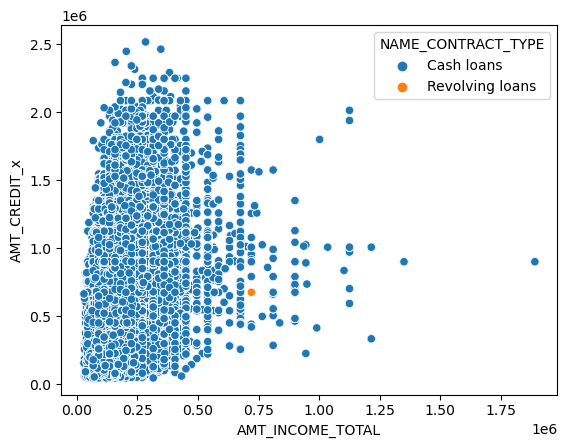

In [199]:
#imprimir el grafico
sns.scatterplot(data=df, color='m', x='AMT_INCOME_TOTAL', y="AMT_CREDIT_x", hue = "NAME_CONTRACT_TYPE");

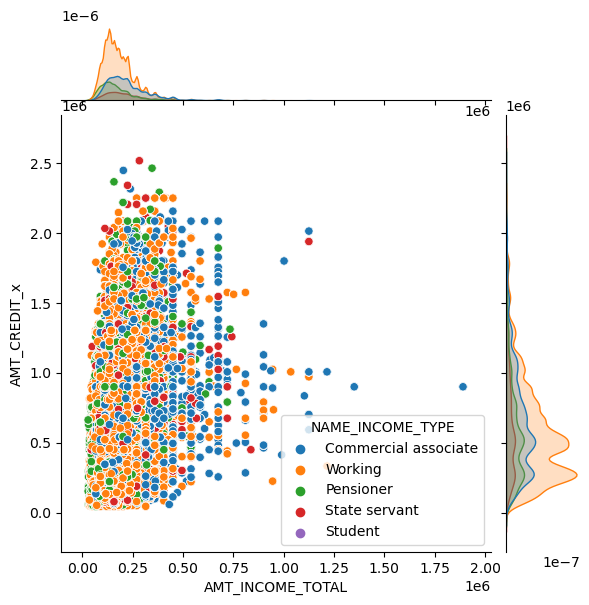

In [200]:
#imprimir el grafico
sns.jointplot(data=df, color='m',  x='AMT_INCOME_TOTAL', y="AMT_CREDIT_x", hue = "NAME_INCOME_TYPE");

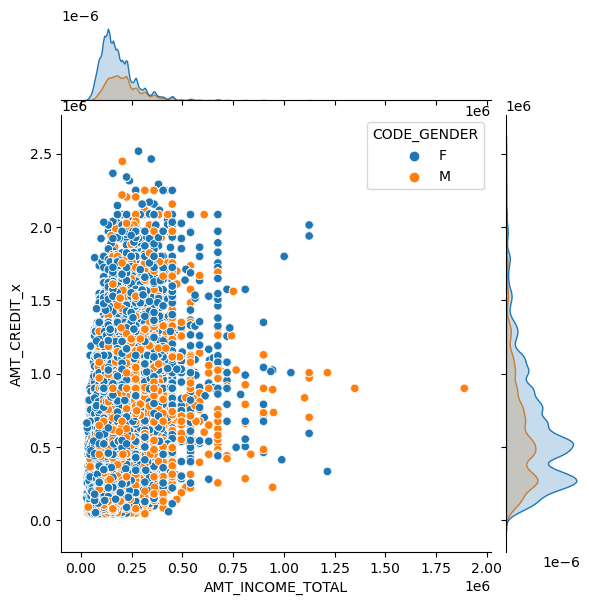

In [202]:
#imprimir el grafico
sns.jointplot(data=df, color='m',  x='AMT_INCOME_TOTAL', y="AMT_CREDIT_x", hue = "CODE_GENDER");

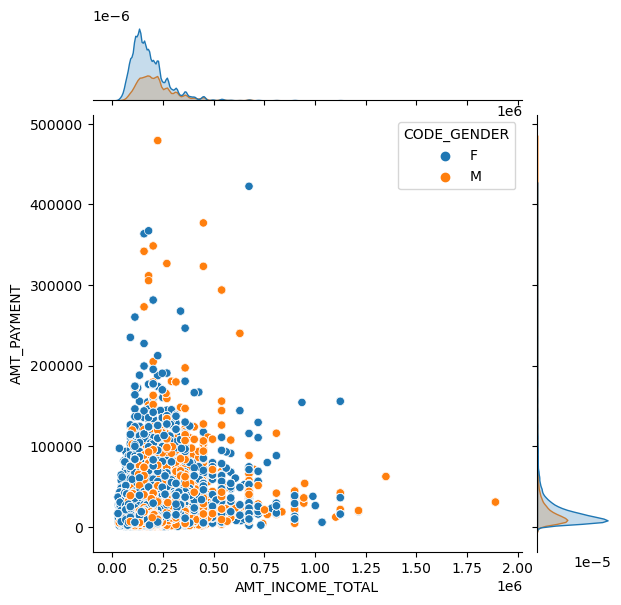

In [203]:

#imprimir el grafico
sns.jointplot(data=df, color='m',  x='AMT_INCOME_TOTAL', y="AMT_PAYMENT", hue = "CODE_GENDER");

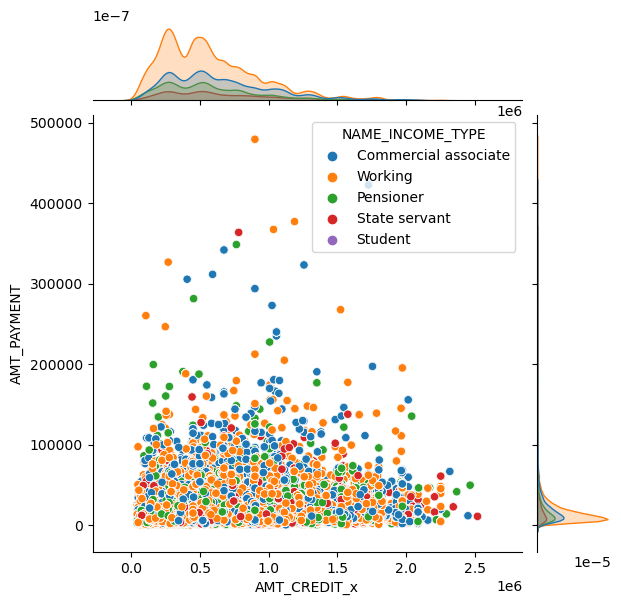

In [204]:
#imprimir el grafico
sns.jointplot(data=df, color='m',  x='AMT_CREDIT_x', y="AMT_PAYMENT", hue = "NAME_INCOME_TYPE");

In [ ]:
#categoricos
p = tt.groupby(["TARGET", "NAME_CONTRACT_TYPE"], as_index=False)["SK_ID_CURR"].count()
p

In [ ]:
#f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="NAME_CONTRACT_TYPE", y="SK_ID_CURR", hue = "TARGET",
            data=p,
             #color="b"
           )
ax.set_title("Desbalance variable objetivo")

In [ ]:
#categoricos
p = tt.groupby(["TARGET", "CODE_GENDER"], as_index=False)["SK_ID_CURR"].count()
p

In [ ]:
#f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="CODE_GENDER", y="SK_ID_CURR", hue = "TARGET",
            data=p,
             #color="b"
           )
ax.set_title("Desbalance variable objetivo")

In [ ]:
from sklearn import preprocessing

In [ ]:
z_scaler = preprocessing.StandardScaler()
d1 = tt[["AMT_ANNUITY", "AMT_CREDIT", "AMT_INCOME_TOTAL"]]
iris_z = z_scaler.fit_transform(d1)

#convertir iris_z en un dataframe
iris_z = pd.DataFrame(iris_z)

In [ ]:
iris_z["TARGET"] = tt["TARGET"]
iris_z["NAME_CONTRACT_TYPE"] = tt["NAME_CONTRACT_TYPE"]
iris_z = iris_z.rename(columns={'0':'AMT_ANNUITY',
                                   '1':'AMT_CREDIT',
                               '2':'AMT_INCOME_TOTAL'})
iris_z.head()

In [ ]:
# Draw a nested boxplot to show bills by day and time
sns.pairplot(iris_z[[0, 1, 2, "TARGET"]], hue="TARGET")

In [ ]:
#imprimir el grafico
sns.jointplot(data=iris_z, color='m', x=0, y=1, hue = "NAME_CONTRACT_TYPE");

In [ ]:
sns.violinplot(data=tt, x="CODE_GENDER", y="AMT_CREDIT", hue="TARGET",
               split=True, inner="quart", linewidth=1)

In [ ]:
Ss#iris_z['CODE_GENDER'] = tt['CODE_GENDER']
sns.violinplot(data=tt, x="NAME_CONTRACT_TYPE", y="AMT_REQ_CREDIT_BUREAU_YEAR", hue="TARGET",
               split=True, inner="quart", linewidth=1)

In [ ]:
#import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=tt, x="NAME_CONTRACT_TYPE", y="AMT_REQ_CREDIT_BUREAU_YEAR", hue="TARGET",
    dodge=True, alpha=.25, zorder=1, legend=False
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=tt, x="NAME_CONTRACT_TYPE", y="AMT_REQ_CREDIT_BUREAU_YEAR", hue="TARGET",
    join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.75, errorbar=None
)

# Improve the legend
sns.move_legend(
    ax, loc="upper right", ncol=3, frameon=True, columnspacing=1, handletextpad=0
)